<h2>Package import</h2>

In [1]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn import ensemble, metrics
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.svm import LinearSVC
from sklearn.utils import check_random_state
import time
from sklearn.preprocessing import MinMaxScaler
import os
import json

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


<h2>Loading data</h2>

In [2]:
df = pd.read_excel('Dataset/DataSet_Large Class - Round 3.xlsx')

In [3]:
cleanup_nums = {"Final annotation":     {1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 0: 0}}

df= df.replace(cleanup_nums)

In [4]:
df.set_index('Code Snippet ID')

,Link,Code Smell,Project Link,CLOC,CELOC,NMD,NAD,NMD_NAD,WMC,WMC_NO_CASE,...,RFC,CBO,DIT,DCC,ATFD_10,NIC,Final annotation,1,2,3
Code Snippet ID,,,,,,,,,,,,,,,,,,,,,
Aseprite.AsepriteAnimation,https://github.com/egordorichev/BurningKnight/...,Large Class,https://github.com/egordorichev/BurningKnight/...,6,0,0,4,4,0,0,...,0,0,0,0,0,0,0,0,0,0
Aseprite.AsepriteCel,https://github.com/egordorichev/BurningKnight/...,Large Class,https://github.com/egordorichev/BurningKnight/...,14,2,0,9,9,2,2,...,0,1,0,1,0,0,0,0,0,0
Aseprite.AsepriteFrame,https://github.com/egordorichev/BurningKnight/...,Large Class,https://github.com/egordorichev/BurningKnight/...,9,1,0,2,2,1,1,...,0,1,0,1,0,0,0,0,0,0
Aseprite.AsepriteImporter,https://github.com/egordorichev/BurningKnight/...,Large Class,https://github.com/egordorichev/BurningKnight/...,6,1,1,0,1,1,1,...,0,1,0,1,0,0,0,0,0,0
Aseprite.AsepriteLayer,https://github.com/egordorichev/BurningKnight/...,Large Class,https://github.com/egordorichev/BurningKnight/...,51,2,0,9,9,2,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
osu.Game.Rulesets.Osu.Edit.Blueprints.Sliders.Components.PathControlPointVisualiser,https://github.com/ppy/osu/tree/2cac373365309a...,Large Class,https://github.com/ppy/osu/tree/2cac373365309a...,216,118,9,7,16,37,36,...,2,5,0,5,2,1,1,/,1,1
osu.Game.Overlays.Comments.CommentEditor,https://github.com/ppy/osu/tree/2cac373365309a...,Large Class,https://github.com/ppy/osu/tree/2cac373365309a...,224,81,2,8,10,8,8,...,1,2,0,3,1,2,1,/,1,1
osu.Game.Screens.Select.FilterQueryParser,https://github.com/ppy/osu/tree/2cac373365309a...,Large Class,https://github.com/ppy/osu/tree/2cac373365309a...,201,132,10,1,11,55,20,...,7,0,0,0,10,0,1,/,1,1


In [5]:
df_train, df_test, y_train_full, y_test = train_test_split(df, df['Final annotation'],stratify=df['Final annotation'], test_size=0.20, random_state=42)

<h2>Data normalization</h2>

In [6]:
column_names = ['CLOC','CELOC','NMD','NAD','NMD_NAD','WMC','WMC_NO_CASE','LCOM','LCOM3','LCOM4','TCC','ATFD','CNOR','CNOL','CNOC','CNOA','NOPM','CMNB','RFC','CBO','DIT','DCC','ATFD_10','NIC','NOPF']
features = df_train[column_names]


column_transformator = ColumnTransformer([('name', StandardScaler(), column_names)], remainder='passthrough')

scaled = column_transformator.fit(features)
X_train_full = scaled.transform(features)

test_features = df_test[column_names]

X_test= scaled.transform(test_features)

trainset_size = len(X_train_full)

<h2>Models definition</h2>

svi modeli implementiraju klasu Model koja se dalje koristi u algoritmu, i metodu koja vraca rezultat predvidjanja modela za dati ulazne parametre

In [7]:
class Model(object):

    def predict(self):
        pass


In [8]:
class RandomForestModel(Model):

    name = 'Random Forest'
    
    def predict(self, X_train, y_train, X_val, X_test, c_weight):
        print ('training random forest...')
        self.model = RandomForestClassifier(n_estimators=314, class_weight=c_weight,random_state=42)
        self.model.fit(X_train, y_train)
        self.test_y_predicted = self.model.predict(X_test)
        self.val_y_predicted = self.model.predict(X_val)
        return (X_train, X_val, X_test, self.val_y_predicted, self.test_y_predicted)

In [9]:
class CatBoostModel(Model):

    name = 'Cat Boost'
    
    def predict(self, X_train, y_train, X_val, X_test, c_weight):
        print ('training cat boost...')
        self.model = CatBoostClassifier(iterations=100, learning_rate=0.1)
        self.model.fit(X_train, y_train)
        self.test_y_predicted = self.model.predict(X_test)
        self.val_y_predicted = self.model.predict(X_val)
        return (X_train, X_val, X_test, self.val_y_predicted, self.test_y_predicted)

In [10]:
class XGBoostModel(Model):

    name = 'XGBooster'
    
    def predict(self, X_train, y_train, X_val, X_test, c_weight):
        print ('training xgboost...')
        self.model = xgb.XGBClassifier()
        self.model.fit(X_train, y_train)
        self.test_y_predicted = self.model.predict(X_test)
        self.val_y_predicted = self.model.predict(X_val)
        return (X_train, X_val, X_test, self.val_y_predicted, self.test_y_predicted)

In [11]:
class BaggingModel(Model):

    name = 'Bagging model'
    
    def predict(self, X_train, y_train, X_val, X_test, c_weight):
        print ('training bagging model...')
        svm = LinearSVC(random_state=42, max_iter = 2000) #default je 1000 za max_iter, mozda treba vise
        self.model = BaggingClassifier(base_estimator=svm, n_estimators=100, random_state=42)
        self.model.fit(X_train, y_train)
        self.test_y_predicted = self.model.predict(X_test)
        self.val_y_predicted = self.model.predict(X_val)
        return (X_train, X_val, X_test, self.val_y_predicted, self.test_y_predicted)

Klasa TrainModel koristi gore definisane modele i za trening i vracanje preciznosti

In [12]:
class TrainModel:

    def __init__(self, model_object):        
        self.accuracies = []
        self.model_object = model_object()        

    def print_name(self):
        print (self.model_object.name)

    def train(self, X_train, y_train, X_val, X_test, c_weight):
        print ('Train set:', X_train.shape, 'y:', y_train.shape)
        print ('Val   set:', X_val.shape)
        print ('Test  set:', X_test.shape)
        t0 = time.time()
        (X_train, X_val, X_test, self.val_y_predicted,
         self.test_y_predicted) = \
            self.model_object.predict(X_train, y_train, X_val, X_test, c_weight)
        self.run_time = time.time() - t0
        return (X_train, X_val, X_test)

    def get_test_accuracy(self, i, y_test):
        classif_rate = np.mean(self.test_y_predicted.ravel() == y_test.ravel()) * 100
        self.accuracies.append(classif_rate)               
        print('-----------------------------------')
        print('Iteration number: ',i)
        print('Example run in %.2f s' % self.run_time)
        print("\nAccuracy for %f " % (classif_rate))    
    
    def print_name(self):
        print (self.model_object.name)

<h2>Quering methods</h2>

metoda koja uzima nasumicne primere iz trening skupa

In [13]:
def get_n_random_samples(initial_labeled_samples, X_train_full,
                         y_train_full):
    random_state = check_random_state(0)
    permutation = np.random.choice(trainset_size,
                                   initial_labeled_samples,
                                   replace=False)

    X_train = X_train_full[permutation]
    y_train = y_train_full[permutation]
    X_train = X_train.reshape((X_train.shape[0], -1))
    bin_count = np.bincount(y_train.astype('int64'))
    unique = np.unique(y_train.astype('int64'))
    print (
        'initial train set:',
        X_train.shape,
        y_train.shape,
        'unique(labels):',
        bin_count,
        unique,
        )
    return (permutation, X_train, y_train)

In [14]:
class QueringMethod(object):

#     def __init__(self):
#         pass

    def select(self):
        pass


In [15]:

class RandomQueringMethod(QueringMethod):

    @staticmethod
    def select(probas_val, initial_labeled_samples):
        random_state = check_random_state(0)
        selection = np.random.choice(probas_val.shape[0], initial_labeled_samples, replace=False)

        return selection

In [16]:
class EntropyQueringMethod(QueringMethod):

    @staticmethod
    def select(probas_val, initial_labeled_samples):
        e = (-probas_val * np.log2(probas_val)).sum(axis=1)
        selection = (np.argsort(e)[::-1])[:initial_labeled_samples]
        return selection

In [17]:
class MarginSamplingQueringMethod(QueringMethod):

    @staticmethod
    def select(probas_val, initial_labeled_samples):
        rev = np.sort(probas_val, axis=1)[:, ::-1]
        values = rev[:, 0] - rev[:, 1]
        selection = np.argsort(values)[:initial_labeled_samples]
        return selection

<h2>Active learning</h2>

algoritam aktivnog ucenja

In [18]:
class ActiveLearning(object):

    accuracies = []

    def __init__(self, initial_labeled_samples, model_object, quering_method):
        self.initial_labeled_samples = initial_labeled_samples
        self.model_object = model_object
        self.quering_method = quering_method

    def run(self, X_train_full, y_train_full, X_test, y_test):

        
        while True:
            try:
                (permutation, X_train, y_train) = \
                    get_n_random_samples(self.initial_labeled_samples,
                                 X_train_full, y_train_full)
#                 print("nema greske pri izboru")
                break
            except:
                pass
#                 print("greska pri izboru")
        self.queried = self.initial_labeled_samples
        self.samplecount = [self.initial_labeled_samples]


        X_val = np.array([])
        y_val = np.array([])
        X_val = np.copy(X_train_full)
        X_val = np.delete(X_val, permutation, axis=0)
        y_val = np.copy(y_train_full)
        y_val = np.delete(y_val, permutation, axis=0)
        

        
        self.clf_model = TrainModel(self.model_object)
        (X_train, X_val, X_test) = self.clf_model.train(X_train, y_train, X_val, X_test, 'balanced')
        active_iteration = 1
        self.clf_model.get_test_accuracy(1, y_test)

        
        while self.queried < max_queried:

            active_iteration += 1

            
            probas_val = \
                self.clf_model.model_object.model.predict_proba(X_val)

            

            uncertain_samples = \
                self.quering_method.select(probas_val, self.initial_labeled_samples)

            


            X_train = np.concatenate((X_train, X_val[uncertain_samples]))
            y_train = np.concatenate((y_train, y_val[uncertain_samples]))

            self.samplecount.append(X_train.shape[0])

            bin_count = np.bincount(y_train.astype('int64'))
            unique = np.unique(y_train.astype('int64'))
            print (
                'updated train set:',
                X_train.shape,
                y_train.shape,
                'unique(labels):',
                bin_count,
                unique,
                )

            X_val = np.delete(X_val, uncertain_samples, axis=0)
            y_val = np.delete(y_val, uncertain_samples, axis=0)



            
            self.queried += self.initial_labeled_samples
            (X_train, X_val, X_test) = self.clf_model.train(X_train, y_train, X_val, X_test, 'balanced')
            self.clf_model.get_test_accuracy(active_iteration, y_test)

        print ('final active learning accuracies',
               self.clf_model.accuracies)


<h2>Experiments</h2>

In [19]:
def pickle_save(fname, data):
    filehandler = open(fname,"wb")
    pickle.dump(data,filehandler)
    filehandler.close() 
    print('saved', fname, os.getcwd(), os.listdir())

def pickle_load(fname):
    print(os.getcwd(), os.listdir())
    file = open(fname,'rb')
    data = pickle.load(file)
    file.close()
    print(data)
    return data
  
def experiment(d, models, quering_methods, Ks, repeats, contfrom):
    algos_temp = []
    print ('stopping at:', max_queried)
    count = 0
    for model_object in models:
        if model_object.__name__ not in d:
            d[model_object.__name__] = {}
      
        for quering_method in quering_methods:
            if quering_method.__name__ not in d[model_object.__name__]:
                d[model_object.__name__][quering_method.__name__] = {}
        
            for k in Ks:
                d[model_object.__name__][quering_method.__name__][str(k)] = []           
            
                for i in range(0, repeats):
                    count+=1
                    if count >= contfrom:
                        print ('Count = %s, using model = %s, quering_method = %s, k = %s, iteration = %s.' % (count, model_object.__name__, quering_method.__name__, k, i))
                        alg = ActiveLearning(k, 
                                       model_object, 
                                       quering_method
                                       )
                        alg.run(X_train_full, y_train_full, X_test, y_test)
                        d[model_object.__name__][quering_method.__name__][str(k)].append(alg.clf_model.accuracies)
              
                        fname = 'Active-learning-experiment-' + str(count) + '.pkl'
                        pickle_save(fname, d)
                        if count % 5 == 0:
                            print(json.dumps(d, indent=2, sort_keys=True))
                        print ()
                        print ('---------------------------- FINISHED ---------------------------')
                        print ()
    return d



In [20]:
def plot_results(fully_supervised_accuracy, dic, models, quering_methods, Ks, repeats):  
    fig, ax = plt.subplots()
    ax.plot([0,300],[fully_supervised_accuracy, fully_supervised_accuracy],label = 'algorithm-upper-bound')
    for model_object in models:
        for quering_method in quering_methods:
            for idx, k in enumerate(Ks):
                x = np.arange(float(Ks[idx]), 300 + float(Ks[idx]), float(Ks[idx]))            
                Sum = np.array(dic[model_object][quering_method][k][0])
                for i in range(1, repeats):
                    Sum = Sum + np.array(dic[model_object][quering_method][k][i])
                mean = Sum / repeats
                ax.plot(x, mean ,label = model_object + '-' + quering_method + '-' + str(k))
    ax.legend()
    ax.set_xlim([50,300])
    ax.set_ylim([40,100])
    ax.grid(True)
    plt.show()

<h2>Random forest experiments</h2>

In [21]:
max_queried = 300

repeats = 1


models = [RandomForestModel] 

# selection_functions = [RandomSelection,MarginSamplingSelection, EntropySelection] 
quering_methods = [RandomQueringMethod,MarginSamplingQueringMethod,EntropyQueringMethod]

Ks = [10,25,50] 
 

d = {}
stopped_at = -1 

# print('directory dump including pickle files:', os.getcwd(), np.sort(os.listdir()))  
# d = pickle_load('Active-learning-experiment-' + str(stopped_at) + '.pkl')  
# print(json.dumps(d, indent=2, sort_keys=True))

d = experiment(d, models, quering_methods, Ks, repeats, stopped_at+1)
print (d)
results = json.loads(json.dumps(d, indent=2, sort_keys=True))
print(results)


stopping at: 300
Count = 1, using model = RandomForestModel, quering_method = RandomQueringMethod, k = 10, iteration = 0.
initial train set: (10, 25) (10,) unique(labels): [9 1] [0 1]
Train set: (10, 25) y: (10,)
Val   set: (726, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
Iteration number:  1
Example run in 0.56 s

Accuracy for 69.565217 
updated train set: (20, 25) (20,) unique(labels): [16  4] [0 1]
Train set: (20, 25) y: (20,)
Val   set: (716, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
Iteration number:  2
Example run in 0.67 s

Accuracy for 83.695652 
updated train set: (30, 25) (30,) unique(labels): [22  8] [0 1]
Train set: (30, 25) y: (30,)
Val   set: (706, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
Iteration number:  3
Example run in 0.64 s

Accuracy for 82.608696 
updated train set: (40, 25) (40,) unique(labels): [30 10] [0 1]
Train set: (40, 25) y

initial train set: (25, 25) (25,) unique(labels): [18  7] [0 1]
Train set: (25, 25) y: (25,)
Val   set: (711, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
Iteration number:  1
Example run in 0.54 s

Accuracy for 69.565217 
updated train set: (50, 25) (50,) unique(labels): [38 12] [0 1]
Train set: (50, 25) y: (50,)
Val   set: (686, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
Iteration number:  2
Example run in 0.55 s

Accuracy for 76.630435 
updated train set: (75, 25) (75,) unique(labels): [54 21] [0 1]
Train set: (75, 25) y: (75,)
Val   set: (661, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
Iteration number:  3
Example run in 0.59 s

Accuracy for 88.586957 
updated train set: (100, 25) (100,) unique(labels): [70 30] [0 1]
Train set: (100, 25) y: (100,)
Val   set: (636, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
Iter

-----------------------------------
Iteration number:  6
Example run in 1.22 s

Accuracy for 95.108696 
updated train set: (70, 25) (70,) unique(labels): [42 28] [0 1]
Train set: (70, 25) y: (70,)
Val   set: (666, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
Iteration number:  7
Example run in 1.10 s

Accuracy for 95.652174 
updated train set: (80, 25) (80,) unique(labels): [49 31] [0 1]
Train set: (80, 25) y: (80,)
Val   set: (656, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
Iteration number:  8
Example run in 0.87 s

Accuracy for 95.108696 
updated train set: (90, 25) (90,) unique(labels): [51 39] [0 1]
Train set: (90, 25) y: (90,)
Val   set: (646, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
Iteration number:  9
Example run in 0.82 s

Accuracy for 95.652174 
updated train set: (100, 25) (100,) unique(labels): [57 43] [0 1]
Train set: (100, 25) y: (100,)
Val 

-----------------------------------
Iteration number:  2
Example run in 1.01 s

Accuracy for 90.217391 
updated train set: (75, 25) (75,) unique(labels): [39 36] [0 1]
Train set: (75, 25) y: (75,)
Val   set: (661, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
Iteration number:  3
Example run in 1.04 s

Accuracy for 93.478261 
updated train set: (100, 25) (100,) unique(labels): [49 51] [0 1]
Train set: (100, 25) y: (100,)
Val   set: (636, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
Iteration number:  4
Example run in 1.04 s

Accuracy for 95.108696 
updated train set: (125, 25) (125,) unique(labels): [65 60] [0 1]
Train set: (125, 25) y: (125,)
Val   set: (611, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
Iteration number:  5
Example run in 1.03 s

Accuracy for 95.108696 
updated train set: (150, 25) (150,) unique(labels): [78 72] [0 1]
Train set: (150, 25) y: (15

-----------------------------------
Iteration number:  6
Example run in 1.02 s

Accuracy for 95.652174 
final active learning accuracies [65.76086956521739, 73.91304347826086, 86.41304347826086, 90.76086956521739, 94.02173913043478, 95.65217391304348]
saved Active-learning-experiment-6.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experiment-3.pkl', 'Active-learning-experiment-4.pkl', 'Active-learning-experiment-5.pkl', 'Active-learning-experiment-6.pkl', 'Active-learning-experiment-7.pkl', 'Active-learning-experiment-8.pkl', 'Active-learning-experiment-9.pkl', 'catboost_info', 'Dataset', 'God class - active learning.ipynb', 'God class.ipynb', 'Long methode.ipynb', 'slike']

---------------------------- FINISHED ---------------------------

Count = 7, using model = RandomForestModel, quer

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: divide by zero encountered in log2
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: invalid value encountered in multiply
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)


-----------------------------------
Iteration number:  2
Example run in 0.92 s

Accuracy for 85.326087 
updated train set: (30, 25) (30,) unique(labels): [27  3] [0 1]
Train set: (30, 25) y: (30,)
Val   set: (706, 25)
Test  set: (184, 25)
training random forest...


C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: divide by zero encountered in log2
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: invalid value encountered in multiply
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)


-----------------------------------
Iteration number:  3
Example run in 1.15 s

Accuracy for 85.326087 
updated train set: (40, 25) (40,) unique(labels): [37  3] [0 1]
Train set: (40, 25) y: (40,)
Val   set: (696, 25)
Test  set: (184, 25)
training random forest...


C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: divide by zero encountered in log2
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: invalid value encountered in multiply
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)


-----------------------------------
Iteration number:  4
Example run in 1.12 s

Accuracy for 84.782609 
updated train set: (50, 25) (50,) unique(labels): [47  3] [0 1]
Train set: (50, 25) y: (50,)
Val   set: (686, 25)
Test  set: (184, 25)
training random forest...


C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: divide by zero encountered in log2
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: invalid value encountered in multiply
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)


-----------------------------------
Iteration number:  5
Example run in 1.15 s

Accuracy for 83.695652 
updated train set: (60, 25) (60,) unique(labels): [57  3] [0 1]
Train set: (60, 25) y: (60,)
Val   set: (676, 25)
Test  set: (184, 25)
training random forest...


C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: divide by zero encountered in log2
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: invalid value encountered in multiply
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)


-----------------------------------
Iteration number:  6
Example run in 0.96 s

Accuracy for 86.956522 
updated train set: (70, 25) (70,) unique(labels): [67  3] [0 1]
Train set: (70, 25) y: (70,)
Val   set: (666, 25)
Test  set: (184, 25)
training random forest...


C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: divide by zero encountered in log2
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: invalid value encountered in multiply
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)


-----------------------------------
Iteration number:  7
Example run in 1.19 s

Accuracy for 84.239130 
updated train set: (80, 25) (80,) unique(labels): [77  3] [0 1]
Train set: (80, 25) y: (80,)
Val   set: (656, 25)
Test  set: (184, 25)
training random forest...


C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: divide by zero encountered in log2
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: invalid value encountered in multiply
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)


-----------------------------------
Iteration number:  8
Example run in 1.19 s

Accuracy for 83.695652 
updated train set: (90, 25) (90,) unique(labels): [87  3] [0 1]
Train set: (90, 25) y: (90,)
Val   set: (646, 25)
Test  set: (184, 25)
training random forest...


C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: divide by zero encountered in log2
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: invalid value encountered in multiply
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)


-----------------------------------
Iteration number:  9
Example run in 0.76 s

Accuracy for 85.869565 
updated train set: (100, 25) (100,) unique(labels): [97  3] [0 1]
Train set: (100, 25) y: (100,)
Val   set: (636, 25)
Test  set: (184, 25)
training random forest...


C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: divide by zero encountered in log2
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: invalid value encountered in multiply
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)


-----------------------------------
Iteration number:  10
Example run in 0.66 s

Accuracy for 83.695652 
updated train set: (110, 25) (110,) unique(labels): [107   3] [0 1]
Train set: (110, 25) y: (110,)
Val   set: (626, 25)
Test  set: (184, 25)
training random forest...


C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: divide by zero encountered in log2
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: invalid value encountered in multiply
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)


-----------------------------------
Iteration number:  11
Example run in 0.63 s

Accuracy for 85.326087 
updated train set: (120, 25) (120,) unique(labels): [117   3] [0 1]
Train set: (120, 25) y: (120,)
Val   set: (616, 25)
Test  set: (184, 25)
training random forest...


C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: divide by zero encountered in log2
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: invalid value encountered in multiply
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)


-----------------------------------
Iteration number:  12
Example run in 0.71 s

Accuracy for 85.326087 
updated train set: (130, 25) (130,) unique(labels): [127   3] [0 1]
Train set: (130, 25) y: (130,)
Val   set: (606, 25)
Test  set: (184, 25)
training random forest...


C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: divide by zero encountered in log2
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: invalid value encountered in multiply
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)


-----------------------------------
Iteration number:  13
Example run in 1.17 s

Accuracy for 85.326087 
updated train set: (140, 25) (140,) unique(labels): [137   3] [0 1]
Train set: (140, 25) y: (140,)
Val   set: (596, 25)
Test  set: (184, 25)
training random forest...


C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: divide by zero encountered in log2
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: invalid value encountered in multiply
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)


-----------------------------------
Iteration number:  14
Example run in 1.04 s

Accuracy for 85.869565 
updated train set: (150, 25) (150,) unique(labels): [147   3] [0 1]
Train set: (150, 25) y: (150,)
Val   set: (586, 25)
Test  set: (184, 25)
training random forest...


C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: divide by zero encountered in log2
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: invalid value encountered in multiply
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)


-----------------------------------
Iteration number:  15
Example run in 0.91 s

Accuracy for 84.782609 
updated train set: (160, 25) (160,) unique(labels): [157   3] [0 1]
Train set: (160, 25) y: (160,)
Val   set: (576, 25)
Test  set: (184, 25)
training random forest...


C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: divide by zero encountered in log2
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: invalid value encountered in multiply
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)


-----------------------------------
Iteration number:  16
Example run in 0.92 s

Accuracy for 86.413043 
updated train set: (170, 25) (170,) unique(labels): [167   3] [0 1]
Train set: (170, 25) y: (170,)
Val   set: (566, 25)
Test  set: (184, 25)
training random forest...


C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: divide by zero encountered in log2
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: invalid value encountered in multiply
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)


-----------------------------------
Iteration number:  17
Example run in 0.95 s

Accuracy for 85.869565 
updated train set: (180, 25) (180,) unique(labels): [177   3] [0 1]
Train set: (180, 25) y: (180,)
Val   set: (556, 25)
Test  set: (184, 25)
training random forest...


C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: divide by zero encountered in log2
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: invalid value encountered in multiply
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)


-----------------------------------
Iteration number:  18
Example run in 0.94 s

Accuracy for 86.956522 
updated train set: (190, 25) (190,) unique(labels): [187   3] [0 1]
Train set: (190, 25) y: (190,)
Val   set: (546, 25)
Test  set: (184, 25)
training random forest...


C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: divide by zero encountered in log2
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: invalid value encountered in multiply
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)


-----------------------------------
Iteration number:  19
Example run in 0.78 s

Accuracy for 86.413043 
updated train set: (200, 25) (200,) unique(labels): [197   3] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training random forest...


C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: divide by zero encountered in log2
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: invalid value encountered in multiply
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)


-----------------------------------
Iteration number:  20
Example run in 0.74 s

Accuracy for 86.413043 
updated train set: (210, 25) (210,) unique(labels): [207   3] [0 1]
Train set: (210, 25) y: (210,)
Val   set: (526, 25)
Test  set: (184, 25)
training random forest...


C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: divide by zero encountered in log2
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: invalid value encountered in multiply
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)


-----------------------------------
Iteration number:  21
Example run in 0.85 s

Accuracy for 86.413043 
updated train set: (220, 25) (220,) unique(labels): [214   6] [0 1]
Train set: (220, 25) y: (220,)
Val   set: (516, 25)
Test  set: (184, 25)
training random forest...


C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: divide by zero encountered in log2
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: invalid value encountered in multiply
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)


-----------------------------------
Iteration number:  22
Example run in 0.69 s

Accuracy for 86.956522 
updated train set: (230, 25) (230,) unique(labels): [224   6] [0 1]
Train set: (230, 25) y: (230,)
Val   set: (506, 25)
Test  set: (184, 25)
training random forest...


C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: divide by zero encountered in log2
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: invalid value encountered in multiply
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)


-----------------------------------
Iteration number:  23
Example run in 0.67 s

Accuracy for 88.043478 
updated train set: (240, 25) (240,) unique(labels): [234   6] [0 1]
Train set: (240, 25) y: (240,)
Val   set: (496, 25)
Test  set: (184, 25)
training random forest...


C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: divide by zero encountered in log2
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: invalid value encountered in multiply
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)


-----------------------------------
Iteration number:  24
Example run in 0.60 s

Accuracy for 88.586957 
updated train set: (250, 25) (250,) unique(labels): [238  12] [0 1]
Train set: (250, 25) y: (250,)
Val   set: (486, 25)
Test  set: (184, 25)
training random forest...


C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: divide by zero encountered in log2
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: invalid value encountered in multiply
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)


-----------------------------------
Iteration number:  25
Example run in 0.67 s

Accuracy for 90.760870 
updated train set: (260, 25) (260,) unique(labels): [243  17] [0 1]
Train set: (260, 25) y: (260,)
Val   set: (476, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
Iteration number:  26
Example run in 0.71 s

Accuracy for 93.478261 
updated train set: (270, 25) (270,) unique(labels): [253  17] [0 1]
Train set: (270, 25) y: (270,)
Val   set: (466, 25)
Test  set: (184, 25)
training random forest...


C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: divide by zero encountered in log2
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: invalid value encountered in multiply
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)


-----------------------------------
Iteration number:  27
Example run in 0.70 s

Accuracy for 92.934783 
updated train set: (280, 25) (280,) unique(labels): [263  17] [0 1]
Train set: (280, 25) y: (280,)
Val   set: (456, 25)
Test  set: (184, 25)
training random forest...


C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: divide by zero encountered in log2
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: invalid value encountered in multiply
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)


-----------------------------------
Iteration number:  28
Example run in 0.98 s

Accuracy for 93.478261 
updated train set: (290, 25) (290,) unique(labels): [273  17] [0 1]
Train set: (290, 25) y: (290,)
Val   set: (446, 25)
Test  set: (184, 25)
training random forest...


C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: divide by zero encountered in log2
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: invalid value encountered in multiply
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)


-----------------------------------
Iteration number:  29
Example run in 0.96 s

Accuracy for 94.021739 
updated train set: (300, 25) (300,) unique(labels): [280  20] [0 1]
Train set: (300, 25) y: (300,)
Val   set: (436, 25)
Test  set: (184, 25)
training random forest...


C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: divide by zero encountered in log2
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: invalid value encountered in multiply
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)


-----------------------------------
Iteration number:  30
Example run in 0.98 s

Accuracy for 94.021739 
final active learning accuracies [73.36956521739131, 85.32608695652173, 85.32608695652173, 84.78260869565217, 83.69565217391305, 86.95652173913044, 84.23913043478261, 83.69565217391305, 85.86956521739131, 83.69565217391305, 85.32608695652173, 85.32608695652173, 85.32608695652173, 85.86956521739131, 84.78260869565217, 86.41304347826086, 85.86956521739131, 86.95652173913044, 86.41304347826086, 86.41304347826086, 86.41304347826086, 86.95652173913044, 88.04347826086956, 88.58695652173914, 90.76086956521739, 93.47826086956522, 92.93478260869566, 93.47826086956522, 94.02173913043478, 94.02173913043478]
saved Active-learning-experiment-7.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experimen

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: divide by zero encountered in log2
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: invalid value encountered in multiply
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)


-----------------------------------
Iteration number:  3
Example run in 1.05 s

Accuracy for 94.565217 
updated train set: (100, 25) (100,) unique(labels): [45 55] [0 1]
Train set: (100, 25) y: (100,)
Val   set: (636, 25)
Test  set: (184, 25)
training random forest...


C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: divide by zero encountered in log2
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: invalid value encountered in multiply
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)


-----------------------------------
Iteration number:  4
Example run in 0.82 s

Accuracy for 95.108696 
updated train set: (125, 25) (125,) unique(labels): [59 66] [0 1]
Train set: (125, 25) y: (125,)
Val   set: (611, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
Iteration number:  5
Example run in 0.62 s

Accuracy for 95.108696 
updated train set: (150, 25) (150,) unique(labels): [75 75] [0 1]
Train set: (150, 25) y: (150,)
Val   set: (586, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
Iteration number:  6
Example run in 0.67 s

Accuracy for 96.195652 
updated train set: (175, 25) (175,) unique(labels): [90 85] [0 1]
Train set: (175, 25) y: (175,)
Val   set: (561, 25)
Test  set: (184, 25)
training random forest...
-----------------------------------
Iteration number:  7
Example run in 0.60 s

Accuracy for 96.195652 
updated train set: (200, 25) (200,) unique(labels): [108  92] [0 1]
Train set: (200, 25) 

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: divide by zero encountered in log2
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: invalid value encountered in multiply
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)


-----------------------------------
Iteration number:  9
Example run in 1.08 s

Accuracy for 96.195652 
updated train set: (250, 25) (250,) unique(labels): [139 111] [0 1]
Train set: (250, 25) y: (250,)
Val   set: (486, 25)
Test  set: (184, 25)
training random forest...


C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: divide by zero encountered in log2
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: invalid value encountered in multiply
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)


-----------------------------------
Iteration number:  10
Example run in 1.08 s

Accuracy for 96.739130 
updated train set: (275, 25) (275,) unique(labels): [161 114] [0 1]
Train set: (275, 25) y: (275,)
Val   set: (461, 25)
Test  set: (184, 25)
training random forest...


C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: divide by zero encountered in log2
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: invalid value encountered in multiply
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)


-----------------------------------
Iteration number:  11
Example run in 1.11 s

Accuracy for 96.739130 
updated train set: (300, 25) (300,) unique(labels): [178 122] [0 1]
Train set: (300, 25) y: (300,)
Val   set: (436, 25)
Test  set: (184, 25)
training random forest...


C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: divide by zero encountered in log2
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: invalid value encountered in multiply
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)


-----------------------------------
Iteration number:  12
Example run in 1.07 s

Accuracy for 96.195652 
final active learning accuracies [71.19565217391305, 86.41304347826086, 94.56521739130434, 95.1086956521739, 95.1086956521739, 96.19565217391305, 96.19565217391305, 95.65217391304348, 96.19565217391305, 96.73913043478261, 96.73913043478261, 96.19565217391305]
saved Active-learning-experiment-8.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experiment-3.pkl', 'Active-learning-experiment-4.pkl', 'Active-learning-experiment-5.pkl', 'Active-learning-experiment-6.pkl', 'Active-learning-experiment-7.pkl', 'Active-learning-experiment-8.pkl', 'Active-learning-experiment-9.pkl', 'catboost_info', 'Dataset', 'God class - active learning.ipynb', 'God class.ipynb', 'Long methode.ipynb', 'slike']

--

C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: divide by zero encountered in log2
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: invalid value encountered in multiply
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)


-----------------------------------
Iteration number:  2
Example run in 0.99 s

Accuracy for 80.434783 
updated train set: (150, 25) (150,) unique(labels): [93 57] [0 1]
Train set: (150, 25) y: (150,)
Val   set: (586, 25)
Test  set: (184, 25)
training random forest...


C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: divide by zero encountered in log2
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: invalid value encountered in multiply
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)


-----------------------------------
Iteration number:  3
Example run in 1.01 s

Accuracy for 86.413043 
updated train set: (200, 25) (200,) unique(labels): [118  82] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training random forest...


C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: divide by zero encountered in log2
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: invalid value encountered in multiply
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)


-----------------------------------
Iteration number:  4
Example run in 1.03 s

Accuracy for 92.391304 
updated train set: (250, 25) (250,) unique(labels): [143 107] [0 1]
Train set: (250, 25) y: (250,)
Val   set: (486, 25)
Test  set: (184, 25)
training random forest...


C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: divide by zero encountered in log2
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: invalid value encountered in multiply
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)


-----------------------------------
Iteration number:  5
Example run in 1.20 s

Accuracy for 94.565217 
updated train set: (300, 25) (300,) unique(labels): [184 116] [0 1]
Train set: (300, 25) y: (300,)
Val   set: (436, 25)
Test  set: (184, 25)
training random forest...


C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: divide by zero encountered in log2
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)
C:\Users\Mihajlo\AppData\Local\Temp\ipykernel_8568\3537685455.py:5: RuntimeWarning: invalid value encountered in multiply
  e = (-probas_val * np.log2(probas_val)).sum(axis=1)


-----------------------------------
Iteration number:  6
Example run in 1.14 s

Accuracy for 96.195652 
final active learning accuracies [73.91304347826086, 80.43478260869566, 86.41304347826086, 92.3913043478261, 94.56521739130434, 96.19565217391305]
saved Active-learning-experiment-9.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experiment-3.pkl', 'Active-learning-experiment-4.pkl', 'Active-learning-experiment-5.pkl', 'Active-learning-experiment-6.pkl', 'Active-learning-experiment-7.pkl', 'Active-learning-experiment-8.pkl', 'Active-learning-experiment-9.pkl', 'catboost_info', 'Dataset', 'God class - active learning.ipynb', 'God class.ipynb', 'Long methode.ipynb', 'slike']

---------------------------- FINISHED ---------------------------

{'RandomForestModel': {'RandomQueringMethod': {'1

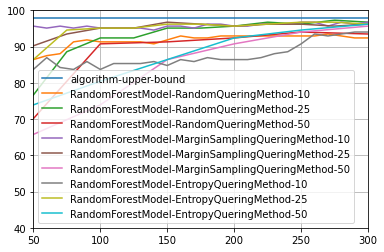

In [26]:
models = ['RandomForestModel']
quering_methods = ['RandomQueringMethod','MarginSamplingQueringMethod','EntropyQueringMethod']
Ks = ['10','25','50']
# Ks = ['10','25']
repeats = 1
random_forest_upper_bound = 98.
total_experiments = len(models) * len(quering_methods) * len(Ks) * repeats


plot_results(random_forest_upper_bound, d, ['RandomForestModel'] , quering_methods    , Ks, 1)

<h2>CatBoost experiments</h2>

In [28]:
max_queried = 300

repeats = 1


models = [CatBoostModel] 


quering_methods = [RandomQueringMethod,MarginSamplingQueringMethod,EntropyQueringMethod]

 
Ks = [10,25,50] 

d = {}
stopped_at = -1 

d = experiment(d, models, quering_methods, Ks, repeats, stopped_at+1)
print (d)
results = json.loads(json.dumps(d, indent=2, sort_keys=True))
print(results)

stopping at: 300
Count = 1, using model = CatBoostModel, quering_method = RandomQueringMethod, k = 10, iteration = 0.
initial train set: (10, 25) (10,) unique(labels): [8 2] [0 1]
Train set: (10, 25) y: (10,)
Val   set: (726, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6505439	total: 139ms	remaining: 13.8s
1:	learn: 0.6041264	total: 141ms	remaining: 6.92s
2:	learn: 0.5541488	total: 144ms	remaining: 4.64s
3:	learn: 0.5022393	total: 145ms	remaining: 3.49s
4:	learn: 0.4867009	total: 147ms	remaining: 2.79s
5:	learn: 0.4414981	total: 149ms	remaining: 2.34s
6:	learn: 0.4167630	total: 152ms	remaining: 2.01s
7:	learn: 0.3938292	total: 153ms	remaining: 1.76s
8:	learn: 0.3809043	total: 155ms	remaining: 1.57s
9:	learn: 0.3595024	total: 158ms	remaining: 1.42s
10:	learn: 0.3378731	total: 159ms	remaining: 1.29s
11:	learn: 0.3152476	total: 162ms	remaining: 1.19s
12:	learn: 0.2838354	total: 164ms	remaining: 1.09s
13:	learn: 0.2616372	total: 166ms	remaining: 1.02s
14:	learn: 0.2478196	to

-----------------------------------
Iteration number:  2
Example run in 0.20 s

Accuracy for 74.456522 
updated train set: (30, 25) (30,) unique(labels): [24  6] [0 1]
Train set: (30, 25) y: (30,)
Val   set: (706, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6043163	total: 9.55ms	remaining: 945ms
1:	learn: 0.5277264	total: 25ms	remaining: 1.23s
2:	learn: 0.4835695	total: 40.7ms	remaining: 1.31s
3:	learn: 0.4301280	total: 55.6ms	remaining: 1.33s
4:	learn: 0.3937726	total: 57.4ms	remaining: 1.09s
5:	learn: 0.3658212	total: 58.8ms	remaining: 921ms
6:	learn: 0.3258542	total: 60.4ms	remaining: 803ms
7:	learn: 0.3079709	total: 86.3ms	remaining: 993ms
8:	learn: 0.2770825	total: 102ms	remaining: 1.03s
9:	learn: 0.2675628	total: 132ms	remaining: 1.19s
10:	learn: 0.2560532	total: 164ms	remaining: 1.33s
11:	learn: 0.2444726	total: 167ms	remaining: 1.22s
12:	learn: 0.2347860	total: 169ms	remaining: 1.13s
13:	learn: 0.2249205	total: 177ms	remaining: 1.09s
14:	learn: 0.2102742	total: 1

updated train set: (50, 25) (50,) unique(labels): [39 11] [0 1]
Train set: (50, 25) y: (50,)
Val   set: (686, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6113931	total: 12.6ms	remaining: 1.24s
1:	learn: 0.5408677	total: 14.6ms	remaining: 714ms
2:	learn: 0.4687487	total: 16.7ms	remaining: 541ms
3:	learn: 0.4108907	total: 18.3ms	remaining: 440ms
4:	learn: 0.3699318	total: 19.9ms	remaining: 378ms
5:	learn: 0.3463190	total: 21.4ms	remaining: 335ms
6:	learn: 0.3147494	total: 23.1ms	remaining: 307ms
7:	learn: 0.2992936	total: 57.9ms	remaining: 665ms
8:	learn: 0.2804111	total: 60.6ms	remaining: 613ms
9:	learn: 0.2523361	total: 62.5ms	remaining: 563ms
10:	learn: 0.2355574	total: 64ms	remaining: 518ms
11:	learn: 0.2125281	total: 66.1ms	remaining: 485ms
12:	learn: 0.2086778	total: 67.4ms	remaining: 451ms
13:	learn: 0.2040685	total: 68.9ms	remaining: 423ms
14:	learn: 0.1954899	total: 70.6ms	remaining: 400ms
15:	learn: 0.1809828	total: 87.9ms	remaining: 461ms
16:	learn: 0.1694190	to

1:	learn: 0.5131886	total: 4.13ms	remaining: 202ms
2:	learn: 0.4328078	total: 5.88ms	remaining: 190ms
3:	learn: 0.3779456	total: 7.18ms	remaining: 172ms
4:	learn: 0.3498604	total: 8.44ms	remaining: 160ms
5:	learn: 0.3261054	total: 9.43ms	remaining: 148ms
6:	learn: 0.3059347	total: 10.8ms	remaining: 144ms
7:	learn: 0.2745548	total: 12.3ms	remaining: 141ms
8:	learn: 0.2514228	total: 13.8ms	remaining: 139ms
9:	learn: 0.2264272	total: 15.9ms	remaining: 143ms
10:	learn: 0.2038742	total: 17.5ms	remaining: 142ms
11:	learn: 0.1853364	total: 19ms	remaining: 140ms
12:	learn: 0.1759295	total: 20.7ms	remaining: 139ms
13:	learn: 0.1676312	total: 22.3ms	remaining: 137ms
14:	learn: 0.1590636	total: 23.7ms	remaining: 134ms
15:	learn: 0.1538482	total: 25.2ms	remaining: 132ms
16:	learn: 0.1410585	total: 26.7ms	remaining: 130ms
17:	learn: 0.1335286	total: 28.4ms	remaining: 130ms
18:	learn: 0.1251051	total: 29.9ms	remaining: 127ms
19:	learn: 0.1214304	total: 31.3ms	remaining: 125ms
20:	learn: 0.1134330	to

85:	learn: 0.0158900	total: 149ms	remaining: 24.2ms
86:	learn: 0.0155406	total: 150ms	remaining: 22.4ms
87:	learn: 0.0152450	total: 152ms	remaining: 20.7ms
88:	learn: 0.0148670	total: 153ms	remaining: 19ms
89:	learn: 0.0144299	total: 155ms	remaining: 17.2ms
90:	learn: 0.0141823	total: 157ms	remaining: 15.5ms
91:	learn: 0.0137864	total: 158ms	remaining: 13.7ms
92:	learn: 0.0134136	total: 160ms	remaining: 12ms
93:	learn: 0.0130616	total: 161ms	remaining: 10.3ms
94:	learn: 0.0127299	total: 163ms	remaining: 8.58ms
95:	learn: 0.0124158	total: 164ms	remaining: 6.85ms
96:	learn: 0.0121182	total: 166ms	remaining: 5.13ms
97:	learn: 0.0118346	total: 167ms	remaining: 3.41ms
98:	learn: 0.0115638	total: 168ms	remaining: 1.7ms
99:	learn: 0.0113071	total: 170ms	remaining: 0us
-----------------------------------
Iteration number:  8
Example run in 0.23 s

Accuracy for 90.760870 
updated train set: (90, 25) (90,) unique(labels): [69 21] [0 1]
Train set: (90, 25) y: (90,)
Val   set: (646, 25)
Test  set:

99:	learn: 0.0141552	total: 179ms	remaining: 0us
-----------------------------------
Iteration number:  10
Example run in 0.24 s

Accuracy for 89.130435 
updated train set: (110, 25) (110,) unique(labels): [84 26] [0 1]
Train set: (110, 25) y: (110,)
Val   set: (626, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6107554	total: 12.9ms	remaining: 1.28s
1:	learn: 0.5323912	total: 14.8ms	remaining: 724ms
2:	learn: 0.4539185	total: 16.7ms	remaining: 541ms
3:	learn: 0.4005112	total: 18.9ms	remaining: 455ms
4:	learn: 0.3625544	total: 20.6ms	remaining: 391ms
5:	learn: 0.3299905	total: 23ms	remaining: 361ms
6:	learn: 0.3026568	total: 25ms	remaining: 332ms
7:	learn: 0.2822951	total: 26.9ms	remaining: 309ms
8:	learn: 0.2628596	total: 28.5ms	remaining: 288ms
9:	learn: 0.2461336	total: 30.4ms	remaining: 273ms
10:	learn: 0.2191717	total: 32.1ms	remaining: 260ms
11:	learn: 0.2055199	total: 34ms	remaining: 249ms
12:	learn: 0.1941689	total: 36.8ms	remaining: 247ms
13:	learn: 0.1869522	tota

78:	learn: 0.0256269	total: 182ms	remaining: 48.5ms
79:	learn: 0.0249863	total: 185ms	remaining: 46.2ms
80:	learn: 0.0242724	total: 186ms	remaining: 43.6ms
81:	learn: 0.0239506	total: 188ms	remaining: 41.2ms
82:	learn: 0.0233843	total: 190ms	remaining: 38.8ms
83:	learn: 0.0229253	total: 191ms	remaining: 36.4ms
84:	learn: 0.0226133	total: 194ms	remaining: 34.2ms
85:	learn: 0.0220117	total: 195ms	remaining: 31.8ms
86:	learn: 0.0217443	total: 198ms	remaining: 29.5ms
87:	learn: 0.0211875	total: 200ms	remaining: 27.2ms
88:	learn: 0.0209926	total: 202ms	remaining: 24.9ms
89:	learn: 0.0206037	total: 204ms	remaining: 22.6ms
90:	learn: 0.0201501	total: 206ms	remaining: 20.3ms
91:	learn: 0.0199769	total: 208ms	remaining: 18.1ms
92:	learn: 0.0194891	total: 210ms	remaining: 15.8ms
93:	learn: 0.0191894	total: 212ms	remaining: 13.5ms
94:	learn: 0.0190428	total: 214ms	remaining: 11.2ms
95:	learn: 0.0187069	total: 215ms	remaining: 8.97ms
96:	learn: 0.0183509	total: 217ms	remaining: 6.71ms
97:	learn: 0

82:	learn: 0.0247565	total: 182ms	remaining: 37.3ms
83:	learn: 0.0242354	total: 186ms	remaining: 35.4ms
84:	learn: 0.0236557	total: 189ms	remaining: 33.3ms
85:	learn: 0.0228512	total: 192ms	remaining: 31.3ms
86:	learn: 0.0223155	total: 197ms	remaining: 29.5ms
87:	learn: 0.0215849	total: 202ms	remaining: 27.5ms
88:	learn: 0.0212160	total: 204ms	remaining: 25.3ms
89:	learn: 0.0208332	total: 208ms	remaining: 23.1ms
90:	learn: 0.0204128	total: 211ms	remaining: 20.8ms
91:	learn: 0.0201522	total: 214ms	remaining: 18.6ms
92:	learn: 0.0195899	total: 216ms	remaining: 16.2ms
93:	learn: 0.0192269	total: 218ms	remaining: 13.9ms
94:	learn: 0.0187237	total: 221ms	remaining: 11.6ms
95:	learn: 0.0184998	total: 223ms	remaining: 9.31ms
96:	learn: 0.0182234	total: 226ms	remaining: 6.99ms
97:	learn: 0.0177908	total: 229ms	remaining: 4.68ms
98:	learn: 0.0174863	total: 232ms	remaining: 2.34ms
99:	learn: 0.0172495	total: 234ms	remaining: 0us
-----------------------------------
Iteration number:  14
Example r

55:	learn: 0.0498675	total: 141ms	remaining: 111ms
56:	learn: 0.0484021	total: 143ms	remaining: 108ms
57:	learn: 0.0474983	total: 146ms	remaining: 106ms
58:	learn: 0.0469728	total: 148ms	remaining: 103ms
59:	learn: 0.0455236	total: 150ms	remaining: 100ms
60:	learn: 0.0443065	total: 153ms	remaining: 97.7ms
61:	learn: 0.0431487	total: 155ms	remaining: 95.1ms
62:	learn: 0.0417242	total: 157ms	remaining: 92.3ms
63:	learn: 0.0401503	total: 160ms	remaining: 89.8ms
64:	learn: 0.0388031	total: 162ms	remaining: 87ms
65:	learn: 0.0381737	total: 163ms	remaining: 84.1ms
66:	learn: 0.0374009	total: 165ms	remaining: 81.4ms
67:	learn: 0.0364288	total: 168ms	remaining: 79ms
68:	learn: 0.0358238	total: 170ms	remaining: 76.6ms
69:	learn: 0.0349539	total: 174ms	remaining: 74.5ms
70:	learn: 0.0344079	total: 176ms	remaining: 72ms
71:	learn: 0.0330013	total: 179ms	remaining: 69.5ms
72:	learn: 0.0322521	total: 181ms	remaining: 66.9ms
73:	learn: 0.0317827	total: 183ms	remaining: 64.3ms
74:	learn: 0.0311927	to

12:	learn: 0.1937699	total: 36ms	remaining: 241ms
13:	learn: 0.1824422	total: 38.5ms	remaining: 236ms
14:	learn: 0.1714293	total: 40.3ms	remaining: 229ms
15:	learn: 0.1633563	total: 42.1ms	remaining: 221ms
16:	learn: 0.1570867	total: 44ms	remaining: 215ms
17:	learn: 0.1527308	total: 46ms	remaining: 210ms
18:	learn: 0.1461264	total: 48ms	remaining: 205ms
19:	learn: 0.1413265	total: 49.9ms	remaining: 200ms
20:	learn: 0.1345577	total: 52ms	remaining: 196ms
21:	learn: 0.1316467	total: 54.2ms	remaining: 192ms
22:	learn: 0.1288921	total: 56.5ms	remaining: 189ms
23:	learn: 0.1255624	total: 58.4ms	remaining: 185ms
24:	learn: 0.1206228	total: 60.5ms	remaining: 181ms
25:	learn: 0.1177206	total: 62.9ms	remaining: 179ms
26:	learn: 0.1150265	total: 65.1ms	remaining: 176ms
27:	learn: 0.1118969	total: 67.4ms	remaining: 173ms
28:	learn: 0.1086519	total: 69.2ms	remaining: 169ms
29:	learn: 0.1052103	total: 71.2ms	remaining: 166ms
30:	learn: 0.1026285	total: 72.8ms	remaining: 162ms
31:	learn: 0.1020419	t

99:	learn: 0.0183774	total: 248ms	remaining: 0us
-----------------------------------
Iteration number:  19
Example run in 0.33 s

Accuracy for 92.934783 
updated train set: (200, 25) (200,) unique(labels): [148  52] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.5851882	total: 2.81ms	remaining: 278ms
1:	learn: 0.5020559	total: 5.73ms	remaining: 281ms
2:	learn: 0.4413718	total: 8.53ms	remaining: 276ms
3:	learn: 0.3893760	total: 11.2ms	remaining: 269ms
4:	learn: 0.3413960	total: 14.4ms	remaining: 273ms
5:	learn: 0.3154613	total: 17ms	remaining: 267ms
6:	learn: 0.2806409	total: 19.8ms	remaining: 262ms
7:	learn: 0.2601263	total: 22.2ms	remaining: 256ms
8:	learn: 0.2424413	total: 24.8ms	remaining: 251ms
9:	learn: 0.2272058	total: 27.2ms	remaining: 244ms
10:	learn: 0.2113411	total: 30.1ms	remaining: 243ms
11:	learn: 0.1979686	total: 32.6ms	remaining: 239ms
12:	learn: 0.1891246	total: 35.4ms	remaining: 237ms
13:	learn: 0.181728

81:	learn: 0.0286215	total: 240ms	remaining: 52.8ms
82:	learn: 0.0284854	total: 244ms	remaining: 49.9ms
83:	learn: 0.0277584	total: 247ms	remaining: 47.1ms
84:	learn: 0.0269063	total: 250ms	remaining: 44.2ms
85:	learn: 0.0263039	total: 254ms	remaining: 41.3ms
86:	learn: 0.0256530	total: 257ms	remaining: 38.3ms
87:	learn: 0.0247901	total: 260ms	remaining: 35.5ms
88:	learn: 0.0241773	total: 263ms	remaining: 32.5ms
89:	learn: 0.0236329	total: 266ms	remaining: 29.6ms
90:	learn: 0.0231424	total: 269ms	remaining: 26.6ms
91:	learn: 0.0226550	total: 272ms	remaining: 23.7ms
92:	learn: 0.0224104	total: 275ms	remaining: 20.7ms
93:	learn: 0.0220074	total: 277ms	remaining: 17.7ms
94:	learn: 0.0218060	total: 280ms	remaining: 14.8ms
95:	learn: 0.0215494	total: 283ms	remaining: 11.8ms
96:	learn: 0.0211853	total: 285ms	remaining: 8.83ms
97:	learn: 0.0209388	total: 288ms	remaining: 5.88ms
98:	learn: 0.0204921	total: 291ms	remaining: 2.94ms
99:	learn: 0.0202286	total: 294ms	remaining: 0us
---------------

62:	learn: 0.0575054	total: 195ms	remaining: 115ms
63:	learn: 0.0564596	total: 199ms	remaining: 112ms
64:	learn: 0.0545873	total: 202ms	remaining: 109ms
65:	learn: 0.0534204	total: 205ms	remaining: 106ms
66:	learn: 0.0525034	total: 208ms	remaining: 103ms
67:	learn: 0.0507677	total: 212ms	remaining: 99.7ms
68:	learn: 0.0495098	total: 215ms	remaining: 96.7ms
69:	learn: 0.0487944	total: 218ms	remaining: 93.6ms
70:	learn: 0.0469494	total: 221ms	remaining: 90.4ms
71:	learn: 0.0452252	total: 224ms	remaining: 87.3ms
72:	learn: 0.0444315	total: 227ms	remaining: 84ms
73:	learn: 0.0433701	total: 229ms	remaining: 80.6ms
74:	learn: 0.0428815	total: 232ms	remaining: 77.3ms
75:	learn: 0.0416330	total: 235ms	remaining: 74.2ms
76:	learn: 0.0409296	total: 238ms	remaining: 70.9ms
77:	learn: 0.0399578	total: 240ms	remaining: 67.8ms
78:	learn: 0.0383100	total: 243ms	remaining: 64.5ms
79:	learn: 0.0371863	total: 245ms	remaining: 61.4ms
80:	learn: 0.0358646	total: 248ms	remaining: 58.2ms
81:	learn: 0.035230

22:	learn: 0.1352897	total: 84.9ms	remaining: 284ms
23:	learn: 0.1330772	total: 88.6ms	remaining: 281ms
24:	learn: 0.1297061	total: 92.4ms	remaining: 277ms
25:	learn: 0.1269617	total: 96.2ms	remaining: 274ms
26:	learn: 0.1215744	total: 99.1ms	remaining: 268ms
27:	learn: 0.1180893	total: 103ms	remaining: 266ms
28:	learn: 0.1162047	total: 107ms	remaining: 261ms
29:	learn: 0.1124461	total: 109ms	remaining: 255ms
30:	learn: 0.1100745	total: 112ms	remaining: 250ms
31:	learn: 0.1061598	total: 115ms	remaining: 244ms
32:	learn: 0.1042222	total: 118ms	remaining: 240ms
33:	learn: 0.1014506	total: 122ms	remaining: 238ms
34:	learn: 0.0990433	total: 125ms	remaining: 233ms
35:	learn: 0.0968032	total: 129ms	remaining: 229ms
36:	learn: 0.0949212	total: 132ms	remaining: 225ms
37:	learn: 0.0935124	total: 136ms	remaining: 222ms
38:	learn: 0.0915208	total: 140ms	remaining: 219ms
39:	learn: 0.0893649	total: 143ms	remaining: 215ms
40:	learn: 0.0875796	total: 147ms	remaining: 211ms
41:	learn: 0.0853589	total

-----------------------------------
Iteration number:  26
Example run in 0.45 s

Accuracy for 94.021739 
updated train set: (270, 25) (270,) unique(labels): [194  76] [0 1]
Train set: (270, 25) y: (270,)
Val   set: (466, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.5965020	total: 13ms	remaining: 1.29s
1:	learn: 0.5021874	total: 15.8ms	remaining: 776ms
2:	learn: 0.4337733	total: 19.4ms	remaining: 626ms
3:	learn: 0.3915420	total: 22.2ms	remaining: 533ms
4:	learn: 0.3517398	total: 25.5ms	remaining: 484ms
5:	learn: 0.3201625	total: 28.4ms	remaining: 445ms
6:	learn: 0.2953192	total: 31.4ms	remaining: 417ms
7:	learn: 0.2737758	total: 34.7ms	remaining: 399ms
8:	learn: 0.2575630	total: 37.4ms	remaining: 379ms
9:	learn: 0.2376673	total: 40.4ms	remaining: 364ms
10:	learn: 0.2251836	total: 43.1ms	remaining: 349ms
11:	learn: 0.2159574	total: 45.9ms	remaining: 337ms
12:	learn: 0.2015944	total: 48.9ms	remaining: 328ms
13:	learn: 0.1924945	total: 51.7ms	remaining: 317ms
14:	learn: 0.185

72:	learn: 0.0467935	total: 266ms	remaining: 98.6ms
73:	learn: 0.0453765	total: 271ms	remaining: 95.1ms
74:	learn: 0.0445008	total: 276ms	remaining: 91.9ms
75:	learn: 0.0428388	total: 279ms	remaining: 88.2ms
76:	learn: 0.0420491	total: 283ms	remaining: 84.6ms
77:	learn: 0.0409542	total: 291ms	remaining: 82ms
78:	learn: 0.0398981	total: 294ms	remaining: 78.2ms
79:	learn: 0.0391770	total: 298ms	remaining: 74.5ms
80:	learn: 0.0384546	total: 303ms	remaining: 71ms
81:	learn: 0.0374691	total: 308ms	remaining: 67.6ms
82:	learn: 0.0366355	total: 312ms	remaining: 63.9ms
83:	learn: 0.0357092	total: 316ms	remaining: 60.2ms
84:	learn: 0.0345816	total: 320ms	remaining: 56.5ms
85:	learn: 0.0339395	total: 324ms	remaining: 52.7ms
86:	learn: 0.0330653	total: 329ms	remaining: 49.1ms
87:	learn: 0.0321367	total: 334ms	remaining: 45.5ms
88:	learn: 0.0317663	total: 338ms	remaining: 41.8ms
89:	learn: 0.0312057	total: 343ms	remaining: 38.1ms
90:	learn: 0.0305450	total: 347ms	remaining: 34.3ms
91:	learn: 0.030

46:	learn: 0.0803475	total: 140ms	remaining: 158ms
47:	learn: 0.0789374	total: 143ms	remaining: 155ms
48:	learn: 0.0778663	total: 146ms	remaining: 152ms
49:	learn: 0.0768901	total: 149ms	remaining: 149ms
50:	learn: 0.0760551	total: 152ms	remaining: 146ms
51:	learn: 0.0751005	total: 155ms	remaining: 143ms
52:	learn: 0.0744694	total: 158ms	remaining: 141ms
53:	learn: 0.0722727	total: 161ms	remaining: 137ms
54:	learn: 0.0703713	total: 164ms	remaining: 134ms
55:	learn: 0.0698145	total: 167ms	remaining: 131ms
56:	learn: 0.0683363	total: 169ms	remaining: 128ms
57:	learn: 0.0671331	total: 172ms	remaining: 125ms
58:	learn: 0.0662821	total: 175ms	remaining: 122ms
59:	learn: 0.0642981	total: 178ms	remaining: 119ms
60:	learn: 0.0620509	total: 182ms	remaining: 116ms
61:	learn: 0.0609347	total: 184ms	remaining: 113ms
62:	learn: 0.0595833	total: 188ms	remaining: 110ms
63:	learn: 0.0586816	total: 190ms	remaining: 107ms
64:	learn: 0.0568914	total: 193ms	remaining: 104ms
65:	learn: 0.0555625	total: 197

3:	learn: 0.4880219	total: 11.6ms	remaining: 277ms
4:	learn: 0.4574791	total: 14.2ms	remaining: 270ms
5:	learn: 0.4301366	total: 16.5ms	remaining: 259ms
6:	learn: 0.3945719	total: 18.9ms	remaining: 250ms
7:	learn: 0.3569495	total: 21.9ms	remaining: 252ms
8:	learn: 0.3290898	total: 24.2ms	remaining: 244ms
9:	learn: 0.2973020	total: 26.5ms	remaining: 238ms
10:	learn: 0.2862456	total: 29.4ms	remaining: 238ms
11:	learn: 0.2699284	total: 31.6ms	remaining: 232ms
12:	learn: 0.2453741	total: 34.1ms	remaining: 228ms
13:	learn: 0.2383654	total: 36.2ms	remaining: 222ms
14:	learn: 0.2231404	total: 39.3ms	remaining: 223ms
15:	learn: 0.2126381	total: 41.9ms	remaining: 220ms
16:	learn: 0.1973647	total: 44.1ms	remaining: 215ms
17:	learn: 0.1885958	total: 46.5ms	remaining: 212ms
18:	learn: 0.1782630	total: 48.8ms	remaining: 208ms
19:	learn: 0.1691426	total: 51.4ms	remaining: 206ms
20:	learn: 0.1602566	total: 53.5ms	remaining: 201ms
21:	learn: 0.1535926	total: 56.6ms	remaining: 201ms
22:	learn: 0.147183

82:	learn: 0.0236064	total: 196ms	remaining: 40.2ms
83:	learn: 0.0231776	total: 199ms	remaining: 37.9ms
84:	learn: 0.0228646	total: 202ms	remaining: 35.6ms
85:	learn: 0.0224538	total: 204ms	remaining: 33.2ms
86:	learn: 0.0220753	total: 206ms	remaining: 30.8ms
87:	learn: 0.0217287	total: 209ms	remaining: 28.5ms
88:	learn: 0.0213846	total: 211ms	remaining: 26.1ms
89:	learn: 0.0211744	total: 215ms	remaining: 23.8ms
90:	learn: 0.0207437	total: 218ms	remaining: 21.5ms
91:	learn: 0.0204386	total: 220ms	remaining: 19.1ms
92:	learn: 0.0201386	total: 222ms	remaining: 16.7ms
93:	learn: 0.0199510	total: 225ms	remaining: 14.4ms
94:	learn: 0.0196725	total: 227ms	remaining: 12ms
95:	learn: 0.0192580	total: 230ms	remaining: 9.57ms
96:	learn: 0.0191079	total: 232ms	remaining: 7.17ms
97:	learn: 0.0187629	total: 234ms	remaining: 4.78ms
98:	learn: 0.0184696	total: 236ms	remaining: 2.39ms
99:	learn: 0.0182334	total: 239ms	remaining: 0us
-----------------------------------
Iteration number:  3
Example run 

77:	learn: 0.0315829	total: 213ms	remaining: 60ms
78:	learn: 0.0306437	total: 216ms	remaining: 57.3ms
79:	learn: 0.0298767	total: 218ms	remaining: 54.6ms
80:	learn: 0.0293722	total: 221ms	remaining: 51.7ms
81:	learn: 0.0280638	total: 223ms	remaining: 49ms
82:	learn: 0.0276102	total: 225ms	remaining: 46.2ms
83:	learn: 0.0271922	total: 227ms	remaining: 43.3ms
84:	learn: 0.0261087	total: 230ms	remaining: 40.6ms
85:	learn: 0.0257358	total: 233ms	remaining: 37.9ms
86:	learn: 0.0251987	total: 236ms	remaining: 35.2ms
87:	learn: 0.0248141	total: 238ms	remaining: 32.5ms
88:	learn: 0.0244916	total: 241ms	remaining: 29.8ms
89:	learn: 0.0241310	total: 243ms	remaining: 27ms
90:	learn: 0.0234881	total: 245ms	remaining: 24.3ms
91:	learn: 0.0231003	total: 248ms	remaining: 21.5ms
92:	learn: 0.0226678	total: 250ms	remaining: 18.8ms
93:	learn: 0.0224561	total: 252ms	remaining: 16.1ms
94:	learn: 0.0221990	total: 255ms	remaining: 13.4ms
95:	learn: 0.0217970	total: 257ms	remaining: 10.7ms
96:	learn: 0.02145

91:	learn: 0.0260538	total: 229ms	remaining: 20ms
92:	learn: 0.0258553	total: 232ms	remaining: 17.5ms
93:	learn: 0.0252233	total: 234ms	remaining: 14.9ms
94:	learn: 0.0245534	total: 237ms	remaining: 12.5ms
95:	learn: 0.0242786	total: 239ms	remaining: 9.98ms
96:	learn: 0.0235208	total: 242ms	remaining: 7.48ms
97:	learn: 0.0233500	total: 245ms	remaining: 5ms
98:	learn: 0.0231788	total: 247ms	remaining: 2.5ms
99:	learn: 0.0226175	total: 251ms	remaining: 0us
-----------------------------------
Iteration number:  7
Example run in 0.33 s

Accuracy for 94.021739 
updated train set: (200, 25) (200,) unique(labels): [160  40] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6041539	total: 2.78ms	remaining: 275ms
1:	learn: 0.5077602	total: 5.15ms	remaining: 252ms
2:	learn: 0.4442435	total: 7.84ms	remaining: 254ms
3:	learn: 0.3891021	total: 10.3ms	remaining: 246ms
4:	learn: 0.3555921	total: 12.7ms	remaining: 242ms
5:	learn: 0.3275273

84:	learn: 0.0255813	total: 178ms	remaining: 31.5ms
85:	learn: 0.0250857	total: 180ms	remaining: 29.4ms
86:	learn: 0.0246026	total: 182ms	remaining: 27.2ms
87:	learn: 0.0242260	total: 185ms	remaining: 25.2ms
88:	learn: 0.0236382	total: 186ms	remaining: 23ms
89:	learn: 0.0232653	total: 189ms	remaining: 21ms
90:	learn: 0.0228757	total: 191ms	remaining: 18.8ms
91:	learn: 0.0225775	total: 193ms	remaining: 16.8ms
92:	learn: 0.0218744	total: 194ms	remaining: 14.6ms
93:	learn: 0.0215449	total: 196ms	remaining: 12.5ms
94:	learn: 0.0213280	total: 198ms	remaining: 10.4ms
95:	learn: 0.0207181	total: 200ms	remaining: 8.34ms
96:	learn: 0.0203331	total: 202ms	remaining: 6.25ms
97:	learn: 0.0199349	total: 204ms	remaining: 4.16ms
98:	learn: 0.0197614	total: 206ms	remaining: 2.08ms
99:	learn: 0.0195782	total: 207ms	remaining: 0us
-----------------------------------
Iteration number:  9
Example run in 0.28 s

Accuracy for 92.391304 
updated train set: (250, 25) (250,) unique(labels): [191  59] [0 1]
Tra

57:	learn: 0.0530437	total: 149ms	remaining: 108ms
58:	learn: 0.0513786	total: 152ms	remaining: 106ms
59:	learn: 0.0499079	total: 154ms	remaining: 103ms
60:	learn: 0.0487690	total: 157ms	remaining: 100ms
61:	learn: 0.0480738	total: 159ms	remaining: 97.3ms
62:	learn: 0.0475451	total: 161ms	remaining: 94.5ms
63:	learn: 0.0457596	total: 163ms	remaining: 91.9ms
64:	learn: 0.0451887	total: 166ms	remaining: 89.1ms
65:	learn: 0.0445806	total: 168ms	remaining: 86.3ms
66:	learn: 0.0440909	total: 169ms	remaining: 83.4ms
67:	learn: 0.0435645	total: 172ms	remaining: 81ms
68:	learn: 0.0428083	total: 175ms	remaining: 78.5ms
69:	learn: 0.0414860	total: 177ms	remaining: 76ms
70:	learn: 0.0411528	total: 180ms	remaining: 73.5ms
71:	learn: 0.0399373	total: 182ms	remaining: 70.8ms
72:	learn: 0.0389771	total: 184ms	remaining: 68.1ms
73:	learn: 0.0375838	total: 187ms	remaining: 65.6ms
74:	learn: 0.0369366	total: 189ms	remaining: 63ms
75:	learn: 0.0358264	total: 192ms	remaining: 60.5ms
76:	learn: 0.0351254	t

initial train set: (50, 25) (50,) unique(labels): [38 12] [0 1]
Train set: (50, 25) y: (50,)
Val   set: (686, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6515814	total: 1.92ms	remaining: 190ms
1:	learn: 0.6081397	total: 3.54ms	remaining: 174ms
2:	learn: 0.5682862	total: 5.51ms	remaining: 178ms
3:	learn: 0.5301060	total: 6.91ms	remaining: 166ms
4:	learn: 0.4989121	total: 8.16ms	remaining: 155ms
5:	learn: 0.4658870	total: 9.64ms	remaining: 151ms
6:	learn: 0.4128584	total: 11.1ms	remaining: 148ms
7:	learn: 0.3909980	total: 12.8ms	remaining: 147ms
8:	learn: 0.3802596	total: 14.2ms	remaining: 144ms
9:	learn: 0.3484161	total: 15.6ms	remaining: 141ms
10:	learn: 0.3197483	total: 17.3ms	remaining: 140ms
11:	learn: 0.3011426	total: 18.9ms	remaining: 138ms
12:	learn: 0.2900499	total: 20.2ms	remaining: 135ms
13:	learn: 0.2809027	total: 22ms	remaining: 135ms
14:	learn: 0.2645241	total: 23.1ms	remaining: 131ms
15:	learn: 0.2552985	total: 24.2ms	remaining: 127ms
16:	learn: 0.2407950	to

updated train set: (150, 25) (150,) unique(labels): [108  42] [0 1]
Train set: (150, 25) y: (150,)
Val   set: (586, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6159698	total: 2.37ms	remaining: 235ms
1:	learn: 0.5622362	total: 4.12ms	remaining: 202ms
2:	learn: 0.5168527	total: 5.83ms	remaining: 189ms
3:	learn: 0.4721963	total: 7.94ms	remaining: 191ms
4:	learn: 0.4392031	total: 10ms	remaining: 190ms
5:	learn: 0.4131632	total: 11.9ms	remaining: 186ms
6:	learn: 0.3959046	total: 13.5ms	remaining: 179ms
7:	learn: 0.3758881	total: 15ms	remaining: 173ms
8:	learn: 0.3600394	total: 16.8ms	remaining: 170ms
9:	learn: 0.3475878	total: 18.3ms	remaining: 164ms
10:	learn: 0.3321953	total: 19.8ms	remaining: 160ms
11:	learn: 0.3187278	total: 21.5ms	remaining: 158ms
12:	learn: 0.3036831	total: 23.2ms	remaining: 155ms
13:	learn: 0.2942273	total: 24.9ms	remaining: 153ms
14:	learn: 0.2820111	total: 26.3ms	remaining: 149ms
15:	learn: 0.2674345	total: 28ms	remaining: 147ms
16:	learn: 0.2642625	

1:	learn: 0.5328069	total: 8.75ms	remaining: 429ms
2:	learn: 0.4877392	total: 11.3ms	remaining: 365ms
3:	learn: 0.4412395	total: 13.8ms	remaining: 332ms
4:	learn: 0.4089418	total: 16.3ms	remaining: 310ms
5:	learn: 0.3810700	total: 19.2ms	remaining: 301ms
6:	learn: 0.3619310	total: 21.8ms	remaining: 290ms
7:	learn: 0.3434022	total: 24.8ms	remaining: 286ms
8:	learn: 0.3252366	total: 27.8ms	remaining: 281ms
9:	learn: 0.3121386	total: 30.2ms	remaining: 272ms
10:	learn: 0.2936193	total: 32.7ms	remaining: 265ms
11:	learn: 0.2813716	total: 35.5ms	remaining: 260ms
12:	learn: 0.2719393	total: 37.9ms	remaining: 254ms
13:	learn: 0.2632604	total: 40.1ms	remaining: 247ms
14:	learn: 0.2507342	total: 42.6ms	remaining: 241ms
15:	learn: 0.2423295	total: 45.3ms	remaining: 238ms
16:	learn: 0.2354172	total: 47.5ms	remaining: 232ms
17:	learn: 0.2270558	total: 49.9ms	remaining: 228ms
18:	learn: 0.2212390	total: 52.7ms	remaining: 225ms
19:	learn: 0.2135812	total: 55.3ms	remaining: 221ms
20:	learn: 0.2096959	

80:	learn: 0.0729896	total: 174ms	remaining: 40.8ms
81:	learn: 0.0718106	total: 176ms	remaining: 38.7ms
82:	learn: 0.0698732	total: 178ms	remaining: 36.5ms
83:	learn: 0.0687956	total: 180ms	remaining: 34.3ms
84:	learn: 0.0672139	total: 183ms	remaining: 32.2ms
85:	learn: 0.0661811	total: 185ms	remaining: 30.2ms
86:	learn: 0.0645068	total: 188ms	remaining: 28.1ms
87:	learn: 0.0635203	total: 190ms	remaining: 26ms
88:	learn: 0.0618878	total: 194ms	remaining: 23.9ms
89:	learn: 0.0613974	total: 196ms	remaining: 21.8ms
90:	learn: 0.0599887	total: 198ms	remaining: 19.6ms
91:	learn: 0.0597909	total: 200ms	remaining: 17.4ms
92:	learn: 0.0585145	total: 202ms	remaining: 15.2ms
93:	learn: 0.0575979	total: 204ms	remaining: 13.1ms
94:	learn: 0.0571866	total: 206ms	remaining: 10.9ms
95:	learn: 0.0564162	total: 208ms	remaining: 8.67ms
96:	learn: 0.0548946	total: 210ms	remaining: 6.5ms
97:	learn: 0.0545003	total: 212ms	remaining: 4.32ms
98:	learn: 0.0543221	total: 214ms	remaining: 2.16ms
99:	learn: 0.05

34:	learn: 0.0726610	total: 47.7ms	remaining: 88.7ms
35:	learn: 0.0685260	total: 50.1ms	remaining: 89ms
36:	learn: 0.0650483	total: 52ms	remaining: 88.6ms
37:	learn: 0.0624527	total: 53.5ms	remaining: 87.2ms
38:	learn: 0.0593413	total: 55.2ms	remaining: 86.4ms
39:	learn: 0.0577968	total: 57ms	remaining: 85.5ms
40:	learn: 0.0559350	total: 59ms	remaining: 84.9ms
41:	learn: 0.0537368	total: 61.1ms	remaining: 84.4ms
42:	learn: 0.0524734	total: 62.7ms	remaining: 83.1ms
43:	learn: 0.0511768	total: 64.4ms	remaining: 81.9ms
44:	learn: 0.0480881	total: 66ms	remaining: 80.6ms
45:	learn: 0.0465428	total: 67.9ms	remaining: 79.8ms
46:	learn: 0.0452015	total: 69.8ms	remaining: 78.7ms
47:	learn: 0.0433561	total: 71.7ms	remaining: 77.7ms
48:	learn: 0.0419060	total: 73.1ms	remaining: 76.1ms
49:	learn: 0.0405411	total: 74.4ms	remaining: 74.4ms
50:	learn: 0.0393599	total: 75.7ms	remaining: 72.7ms
51:	learn: 0.0380173	total: 77.1ms	remaining: 71.2ms
52:	learn: 0.0368320	total: 79ms	remaining: 70ms
53:	lea

8:	learn: 0.2624356	total: 14ms	remaining: 141ms
9:	learn: 0.2508717	total: 15.6ms	remaining: 141ms
10:	learn: 0.2410064	total: 18ms	remaining: 145ms
11:	learn: 0.2320940	total: 19.5ms	remaining: 143ms
12:	learn: 0.2138638	total: 20.8ms	remaining: 139ms
13:	learn: 0.2085463	total: 21.8ms	remaining: 134ms
14:	learn: 0.2029289	total: 23.5ms	remaining: 133ms
15:	learn: 0.1816242	total: 25.4ms	remaining: 133ms
16:	learn: 0.1690892	total: 27.2ms	remaining: 133ms
17:	learn: 0.1585204	total: 28.6ms	remaining: 130ms
18:	learn: 0.1472257	total: 29.9ms	remaining: 127ms
19:	learn: 0.1379782	total: 31.5ms	remaining: 126ms
20:	learn: 0.1329159	total: 32.9ms	remaining: 124ms
21:	learn: 0.1263245	total: 34.6ms	remaining: 123ms
22:	learn: 0.1165578	total: 36.1ms	remaining: 121ms
23:	learn: 0.1117172	total: 37.8ms	remaining: 120ms
24:	learn: 0.1092528	total: 39ms	remaining: 117ms
25:	learn: 0.1063000	total: 40.4ms	remaining: 115ms
26:	learn: 0.1024032	total: 41.6ms	remaining: 112ms
27:	learn: 0.1001011

updated train set: (60, 25) (60,) unique(labels): [55  5] [0 1]
Train set: (60, 25) y: (60,)
Val   set: (676, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.5658976	total: 1.37ms	remaining: 136ms
1:	learn: 0.4913143	total: 3.08ms	remaining: 151ms
2:	learn: 0.4308846	total: 4.04ms	remaining: 130ms
3:	learn: 0.3858493	total: 5.17ms	remaining: 124ms
4:	learn: 0.3454513	total: 6.67ms	remaining: 127ms
5:	learn: 0.3081199	total: 7.98ms	remaining: 125ms
6:	learn: 0.2783540	total: 9.19ms	remaining: 122ms
7:	learn: 0.2602874	total: 10.5ms	remaining: 121ms
8:	learn: 0.2399098	total: 11.5ms	remaining: 116ms
9:	learn: 0.2188723	total: 13.3ms	remaining: 120ms
10:	learn: 0.2059527	total: 15ms	remaining: 122ms
11:	learn: 0.1925676	total: 16.7ms	remaining: 123ms
12:	learn: 0.1816884	total: 18.3ms	remaining: 123ms
13:	learn: 0.1693164	total: 19.3ms	remaining: 118ms
14:	learn: 0.1629111	total: 20.4ms	remaining: 116ms
15:	learn: 0.1586576	total: 21.4ms	remaining: 112ms
16:	learn: 0.1503198	to

59:	learn: 0.0536322	total: 106ms	remaining: 70.4ms
60:	learn: 0.0534836	total: 107ms	remaining: 68.6ms
61:	learn: 0.0506065	total: 109ms	remaining: 66.9ms
62:	learn: 0.0479166	total: 111ms	remaining: 65ms
63:	learn: 0.0455955	total: 112ms	remaining: 63ms
64:	learn: 0.0430492	total: 113ms	remaining: 61.1ms
65:	learn: 0.0407957	total: 115ms	remaining: 59.2ms
66:	learn: 0.0388016	total: 116ms	remaining: 57.3ms
67:	learn: 0.0382976	total: 119ms	remaining: 55.8ms
68:	learn: 0.0366381	total: 120ms	remaining: 54ms
69:	learn: 0.0361581	total: 122ms	remaining: 52.3ms
70:	learn: 0.0357219	total: 124ms	remaining: 50.5ms
71:	learn: 0.0352826	total: 125ms	remaining: 48.7ms
72:	learn: 0.0335885	total: 127ms	remaining: 47ms
73:	learn: 0.0321933	total: 145ms	remaining: 50.9ms
74:	learn: 0.0307500	total: 147ms	remaining: 48.9ms
75:	learn: 0.0294471	total: 149ms	remaining: 47.1ms
76:	learn: 0.0283412	total: 151ms	remaining: 45ms
77:	learn: 0.0275991	total: 152ms	remaining: 42.9ms
78:	learn: 0.0267832	t

79:	learn: 0.0332758	total: 145ms	remaining: 36.2ms
80:	learn: 0.0322485	total: 147ms	remaining: 34.6ms
81:	learn: 0.0317741	total: 150ms	remaining: 32.9ms
82:	learn: 0.0306682	total: 152ms	remaining: 31.1ms
83:	learn: 0.0302123	total: 154ms	remaining: 29.3ms
84:	learn: 0.0297418	total: 156ms	remaining: 27.4ms
85:	learn: 0.0287235	total: 158ms	remaining: 25.7ms
86:	learn: 0.0276265	total: 160ms	remaining: 23.9ms
87:	learn: 0.0272194	total: 162ms	remaining: 22.1ms
88:	learn: 0.0267936	total: 164ms	remaining: 20.2ms
89:	learn: 0.0258765	total: 165ms	remaining: 18.4ms
90:	learn: 0.0254784	total: 167ms	remaining: 16.5ms
91:	learn: 0.0251734	total: 169ms	remaining: 14.7ms
92:	learn: 0.0243823	total: 170ms	remaining: 12.8ms
93:	learn: 0.0236694	total: 172ms	remaining: 11ms
94:	learn: 0.0230277	total: 174ms	remaining: 9.15ms
95:	learn: 0.0226395	total: 176ms	remaining: 7.32ms
96:	learn: 0.0219387	total: 178ms	remaining: 5.49ms
97:	learn: 0.0215903	total: 179ms	remaining: 3.66ms
98:	learn: 0.0

75:	learn: 0.0545279	total: 177ms	remaining: 56ms
76:	learn: 0.0538352	total: 180ms	remaining: 53.7ms
77:	learn: 0.0522945	total: 182ms	remaining: 51.4ms
78:	learn: 0.0521932	total: 185ms	remaining: 49.1ms
79:	learn: 0.0506365	total: 187ms	remaining: 46.8ms
80:	learn: 0.0500904	total: 189ms	remaining: 44.4ms
81:	learn: 0.0495235	total: 191ms	remaining: 41.9ms
82:	learn: 0.0475868	total: 193ms	remaining: 39.5ms
83:	learn: 0.0457086	total: 203ms	remaining: 38.7ms
84:	learn: 0.0445116	total: 205ms	remaining: 36.2ms
85:	learn: 0.0444444	total: 207ms	remaining: 33.7ms
86:	learn: 0.0430965	total: 208ms	remaining: 31.1ms
87:	learn: 0.0418850	total: 210ms	remaining: 28.7ms
88:	learn: 0.0403588	total: 212ms	remaining: 26.2ms
89:	learn: 0.0397490	total: 213ms	remaining: 23.7ms
90:	learn: 0.0393718	total: 215ms	remaining: 21.2ms
91:	learn: 0.0389634	total: 217ms	remaining: 18.8ms
92:	learn: 0.0375095	total: 218ms	remaining: 16.4ms
93:	learn: 0.0365695	total: 220ms	remaining: 14ms
94:	learn: 0.035

70:	learn: 0.0695853	total: 162ms	remaining: 66.1ms
71:	learn: 0.0687129	total: 164ms	remaining: 63.8ms
72:	learn: 0.0665540	total: 167ms	remaining: 61.7ms
73:	learn: 0.0653960	total: 170ms	remaining: 59.6ms
74:	learn: 0.0643979	total: 172ms	remaining: 57.3ms
75:	learn: 0.0625582	total: 174ms	remaining: 55ms
76:	learn: 0.0620196	total: 176ms	remaining: 52.7ms
77:	learn: 0.0602586	total: 179ms	remaining: 50.3ms
78:	learn: 0.0593875	total: 180ms	remaining: 48ms
79:	learn: 0.0578252	total: 182ms	remaining: 45.6ms
80:	learn: 0.0564260	total: 185ms	remaining: 43.3ms
81:	learn: 0.0556507	total: 187ms	remaining: 41ms
82:	learn: 0.0537193	total: 189ms	remaining: 38.7ms
83:	learn: 0.0531371	total: 191ms	remaining: 36.3ms
84:	learn: 0.0519612	total: 193ms	remaining: 34ms
85:	learn: 0.0513567	total: 195ms	remaining: 31.7ms
86:	learn: 0.0503185	total: 196ms	remaining: 29.4ms
87:	learn: 0.0496090	total: 199ms	remaining: 27.1ms
88:	learn: 0.0489489	total: 201ms	remaining: 24.8ms
89:	learn: 0.0479984

81:	learn: 0.0639508	total: 185ms	remaining: 40.6ms
82:	learn: 0.0630463	total: 188ms	remaining: 38.4ms
83:	learn: 0.0621924	total: 190ms	remaining: 36.2ms
84:	learn: 0.0610711	total: 193ms	remaining: 34ms
85:	learn: 0.0600329	total: 195ms	remaining: 31.7ms
86:	learn: 0.0583851	total: 197ms	remaining: 29.5ms
87:	learn: 0.0570655	total: 200ms	remaining: 27.3ms
88:	learn: 0.0557431	total: 202ms	remaining: 25ms
89:	learn: 0.0541607	total: 204ms	remaining: 22.7ms
90:	learn: 0.0531951	total: 207ms	remaining: 20.5ms
91:	learn: 0.0522099	total: 209ms	remaining: 18.2ms
92:	learn: 0.0513035	total: 211ms	remaining: 15.9ms
93:	learn: 0.0502394	total: 213ms	remaining: 13.6ms
94:	learn: 0.0494368	total: 215ms	remaining: 11.3ms
95:	learn: 0.0491385	total: 217ms	remaining: 9.05ms
96:	learn: 0.0482544	total: 219ms	remaining: 6.78ms
97:	learn: 0.0475278	total: 222ms	remaining: 4.52ms
98:	learn: 0.0462866	total: 224ms	remaining: 2.26ms
99:	learn: 0.0454235	total: 226ms	remaining: 0us
-------------------

38:	learn: 0.1570321	total: 99.3ms	remaining: 155ms
39:	learn: 0.1563056	total: 103ms	remaining: 154ms
40:	learn: 0.1527626	total: 105ms	remaining: 152ms
41:	learn: 0.1512517	total: 108ms	remaining: 149ms
42:	learn: 0.1494043	total: 111ms	remaining: 147ms
43:	learn: 0.1481389	total: 113ms	remaining: 144ms
44:	learn: 0.1464999	total: 117ms	remaining: 143ms
45:	learn: 0.1434374	total: 120ms	remaining: 141ms
46:	learn: 0.1401204	total: 123ms	remaining: 139ms
47:	learn: 0.1380321	total: 126ms	remaining: 136ms
48:	learn: 0.1355703	total: 128ms	remaining: 134ms
49:	learn: 0.1323527	total: 131ms	remaining: 131ms
50:	learn: 0.1291759	total: 133ms	remaining: 128ms
51:	learn: 0.1258436	total: 136ms	remaining: 126ms
52:	learn: 0.1246380	total: 139ms	remaining: 123ms
53:	learn: 0.1227481	total: 142ms	remaining: 121ms
54:	learn: 0.1196774	total: 145ms	remaining: 119ms
55:	learn: 0.1176934	total: 148ms	remaining: 116ms
56:	learn: 0.1152991	total: 151ms	remaining: 114ms
57:	learn: 0.1116913	total: 15

updated train set: (190, 25) (190,) unique(labels): [113  77] [0 1]
Train set: (190, 25) y: (190,)
Val   set: (546, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6365377	total: 34ms	remaining: 3.36s
1:	learn: 0.5722771	total: 36.4ms	remaining: 1.78s
2:	learn: 0.5264996	total: 39.2ms	remaining: 1.27s
3:	learn: 0.4891078	total: 48.3ms	remaining: 1.16s
4:	learn: 0.4610571	total: 50.9ms	remaining: 968ms
5:	learn: 0.4278637	total: 53.8ms	remaining: 842ms
6:	learn: 0.3961928	total: 56.5ms	remaining: 750ms
7:	learn: 0.3731686	total: 59.1ms	remaining: 679ms
8:	learn: 0.3538327	total: 62ms	remaining: 627ms
9:	learn: 0.3361974	total: 64.7ms	remaining: 582ms
10:	learn: 0.3211190	total: 67.4ms	remaining: 545ms
11:	learn: 0.3108341	total: 70.3ms	remaining: 516ms
12:	learn: 0.3030165	total: 72.9ms	remaining: 488ms
13:	learn: 0.2943332	total: 75.9ms	remaining: 466ms
14:	learn: 0.2786701	total: 78.9ms	remaining: 447ms
15:	learn: 0.2713532	total: 81.6ms	remaining: 429ms
16:	learn: 0.264161

updated train set: (210, 25) (210,) unique(labels): [124  86] [0 1]
Train set: (210, 25) y: (210,)
Val   set: (526, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6274014	total: 14.4ms	remaining: 1.42s
1:	learn: 0.5770353	total: 17.1ms	remaining: 838ms
2:	learn: 0.5443858	total: 20.2ms	remaining: 654ms
3:	learn: 0.5155725	total: 23.2ms	remaining: 557ms
4:	learn: 0.4873961	total: 26.2ms	remaining: 497ms
5:	learn: 0.4627138	total: 28.8ms	remaining: 451ms
6:	learn: 0.4391922	total: 31.6ms	remaining: 420ms
7:	learn: 0.4121370	total: 34.4ms	remaining: 396ms
8:	learn: 0.3884766	total: 37.1ms	remaining: 375ms
9:	learn: 0.3728846	total: 40.3ms	remaining: 363ms
10:	learn: 0.3692420	total: 42.1ms	remaining: 341ms
11:	learn: 0.3523037	total: 45ms	remaining: 330ms
12:	learn: 0.3371407	total: 47.7ms	remaining: 319ms
13:	learn: 0.3248645	total: 50.4ms	remaining: 310ms
14:	learn: 0.3155096	total: 52.8ms	remaining: 299ms
15:	learn: 0.3020783	total: 55.6ms	remaining: 292ms
16:	learn: 0.2884

85:	learn: 0.0708385	total: 245ms	remaining: 39.9ms
86:	learn: 0.0707525	total: 248ms	remaining: 37.1ms
87:	learn: 0.0693471	total: 251ms	remaining: 34.2ms
88:	learn: 0.0683353	total: 253ms	remaining: 31.3ms
89:	learn: 0.0674932	total: 256ms	remaining: 28.4ms
90:	learn: 0.0665098	total: 258ms	remaining: 25.6ms
91:	learn: 0.0654716	total: 262ms	remaining: 22.8ms
92:	learn: 0.0640703	total: 266ms	remaining: 20ms
93:	learn: 0.0628385	total: 269ms	remaining: 17.1ms
94:	learn: 0.0619246	total: 272ms	remaining: 14.3ms
95:	learn: 0.0610836	total: 275ms	remaining: 11.4ms
96:	learn: 0.0597979	total: 278ms	remaining: 8.6ms
97:	learn: 0.0590013	total: 281ms	remaining: 5.74ms
98:	learn: 0.0577282	total: 284ms	remaining: 2.87ms
99:	learn: 0.0567042	total: 287ms	remaining: 0us
-----------------------------------
Iteration number:  22
Example run in 0.38 s

Accuracy for 95.652174 
updated train set: (230, 25) (230,) unique(labels): [137  93] [0 1]
Train set: (230, 25) y: (230,)
Val   set: (506, 25)
T

34:	learn: 0.1914240	total: 91.9ms	remaining: 171ms
35:	learn: 0.1873013	total: 95.2ms	remaining: 169ms
36:	learn: 0.1830119	total: 98.1ms	remaining: 167ms
37:	learn: 0.1790956	total: 101ms	remaining: 164ms
38:	learn: 0.1758845	total: 104ms	remaining: 162ms
39:	learn: 0.1735633	total: 108ms	remaining: 163ms
40:	learn: 0.1718244	total: 112ms	remaining: 161ms
41:	learn: 0.1698951	total: 114ms	remaining: 158ms
42:	learn: 0.1644306	total: 117ms	remaining: 156ms
43:	learn: 0.1630829	total: 120ms	remaining: 153ms
44:	learn: 0.1600202	total: 123ms	remaining: 151ms
45:	learn: 0.1591593	total: 126ms	remaining: 148ms
46:	learn: 0.1551874	total: 129ms	remaining: 146ms
47:	learn: 0.1532627	total: 132ms	remaining: 143ms
48:	learn: 0.1484614	total: 135ms	remaining: 140ms
49:	learn: 0.1470520	total: 137ms	remaining: 137ms
50:	learn: 0.1428002	total: 140ms	remaining: 134ms
51:	learn: 0.1387305	total: 142ms	remaining: 131ms
52:	learn: 0.1351601	total: 145ms	remaining: 129ms
53:	learn: 0.1317593	total: 

8:	learn: 0.3822560	total: 40.6ms	remaining: 411ms
9:	learn: 0.3612970	total: 45.3ms	remaining: 407ms
10:	learn: 0.3457297	total: 48.2ms	remaining: 390ms
11:	learn: 0.3363759	total: 50.8ms	remaining: 373ms
12:	learn: 0.3235443	total: 54.2ms	remaining: 363ms
13:	learn: 0.3124996	total: 57.7ms	remaining: 355ms
14:	learn: 0.2993435	total: 61.7ms	remaining: 350ms
15:	learn: 0.2885796	total: 64.1ms	remaining: 336ms
16:	learn: 0.2792194	total: 66.4ms	remaining: 324ms
17:	learn: 0.2645234	total: 68.5ms	remaining: 312ms
18:	learn: 0.2559258	total: 70.7ms	remaining: 301ms
19:	learn: 0.2442028	total: 73.6ms	remaining: 294ms
20:	learn: 0.2387258	total: 76.2ms	remaining: 287ms
21:	learn: 0.2347001	total: 78.3ms	remaining: 278ms
22:	learn: 0.2307652	total: 80.9ms	remaining: 271ms
23:	learn: 0.2247922	total: 83.5ms	remaining: 264ms
24:	learn: 0.2152544	total: 86.1ms	remaining: 258ms
25:	learn: 0.2083442	total: 88.8ms	remaining: 253ms
26:	learn: 0.2047074	total: 91.2ms	remaining: 247ms
27:	learn: 0.1

1:	learn: 0.5652859	total: 11.4ms	remaining: 557ms
2:	learn: 0.5296169	total: 14.3ms	remaining: 463ms
3:	learn: 0.4997009	total: 17ms	remaining: 408ms
4:	learn: 0.4631593	total: 19.4ms	remaining: 368ms
5:	learn: 0.4457444	total: 21.4ms	remaining: 335ms
6:	learn: 0.4220594	total: 24.4ms	remaining: 324ms
7:	learn: 0.4028036	total: 28.2ms	remaining: 324ms
8:	learn: 0.3779064	total: 31ms	remaining: 314ms
9:	learn: 0.3556533	total: 34.2ms	remaining: 308ms
10:	learn: 0.3436016	total: 36.8ms	remaining: 298ms
11:	learn: 0.3301603	total: 39.2ms	remaining: 287ms
12:	learn: 0.3199254	total: 41.8ms	remaining: 280ms
13:	learn: 0.3109802	total: 44.1ms	remaining: 271ms
14:	learn: 0.2957085	total: 46.9ms	remaining: 266ms
15:	learn: 0.2882151	total: 50.6ms	remaining: 266ms
16:	learn: 0.2782481	total: 53.5ms	remaining: 261ms
17:	learn: 0.2686664	total: 56.5ms	remaining: 257ms
18:	learn: 0.2647642	total: 59.8ms	remaining: 255ms
19:	learn: 0.2579991	total: 63.2ms	remaining: 253ms
20:	learn: 0.2472969	tota

60:	learn: 0.1121082	total: 167ms	remaining: 107ms
61:	learn: 0.1107591	total: 170ms	remaining: 104ms
62:	learn: 0.1092335	total: 173ms	remaining: 102ms
63:	learn: 0.1064992	total: 176ms	remaining: 99.2ms
64:	learn: 0.1041739	total: 179ms	remaining: 96.5ms
65:	learn: 0.1018465	total: 182ms	remaining: 93.9ms
66:	learn: 0.0997616	total: 186ms	remaining: 91.5ms
67:	learn: 0.0977165	total: 189ms	remaining: 88.8ms
68:	learn: 0.0956481	total: 191ms	remaining: 85.8ms
69:	learn: 0.0941659	total: 194ms	remaining: 83ms
70:	learn: 0.0926058	total: 196ms	remaining: 80.1ms
71:	learn: 0.0909207	total: 198ms	remaining: 77.2ms
72:	learn: 0.0891839	total: 201ms	remaining: 74.4ms
73:	learn: 0.0874634	total: 204ms	remaining: 71.6ms
74:	learn: 0.0867337	total: 206ms	remaining: 68.6ms
75:	learn: 0.0856395	total: 208ms	remaining: 65.8ms
76:	learn: 0.0841588	total: 212ms	remaining: 63.2ms
77:	learn: 0.0832645	total: 214ms	remaining: 60.5ms
78:	learn: 0.0815304	total: 217ms	remaining: 57.8ms
79:	learn: 0.0800

initial train set: (25, 25) (25,) unique(labels): [17  8] [0 1]
Train set: (25, 25) y: (25,)
Val   set: (711, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6316317	total: 4.98ms	remaining: 493ms
1:	learn: 0.6067214	total: 7.17ms	remaining: 351ms
2:	learn: 0.5756710	total: 9.12ms	remaining: 295ms
3:	learn: 0.5456096	total: 11.2ms	remaining: 269ms
4:	learn: 0.5079526	total: 12.8ms	remaining: 243ms
5:	learn: 0.4809464	total: 14.6ms	remaining: 228ms
6:	learn: 0.4426678	total: 16.3ms	remaining: 217ms
7:	learn: 0.4046012	total: 18.6ms	remaining: 214ms
8:	learn: 0.3912026	total: 20.1ms	remaining: 203ms
9:	learn: 0.3702478	total: 22.1ms	remaining: 199ms
10:	learn: 0.3522661	total: 24.5ms	remaining: 198ms
11:	learn: 0.3305910	total: 26.3ms	remaining: 193ms
12:	learn: 0.3105771	total: 28ms	remaining: 187ms
13:	learn: 0.3029663	total: 29.1ms	remaining: 179ms
14:	learn: 0.2902543	total: 31.3ms	remaining: 177ms
15:	learn: 0.2761713	total: 33.4ms	remaining: 175ms
16:	learn: 0.2568434	to

96:	learn: 0.0236631	total: 207ms	remaining: 6.4ms
97:	learn: 0.0234415	total: 231ms	remaining: 4.72ms
98:	learn: 0.0230517	total: 233ms	remaining: 2.35ms
99:	learn: 0.0226171	total: 235ms	remaining: 0us
-----------------------------------
Iteration number:  2
Example run in 0.32 s

Accuracy for 78.804348 
updated train set: (75, 25) (75,) unique(labels): [54 21] [0 1]
Train set: (75, 25) y: (75,)
Val   set: (661, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6376435	total: 2.43ms	remaining: 241ms
1:	learn: 0.5783417	total: 4.7ms	remaining: 230ms
2:	learn: 0.5441572	total: 6.68ms	remaining: 216ms
3:	learn: 0.4986745	total: 9.1ms	remaining: 218ms
4:	learn: 0.4644984	total: 11ms	remaining: 210ms
5:	learn: 0.4301804	total: 13.1ms	remaining: 205ms
6:	learn: 0.4075010	total: 15.3ms	remaining: 203ms
7:	learn: 0.3916568	total: 19ms	remaining: 218ms
8:	learn: 0.3737196	total: 21ms	remaining: 213ms
9:	learn: 0.3534177	total: 23.1ms	remaining: 208ms
10:	learn: 0.3302957	total: 24.9m

94:	learn: 0.0441805	total: 173ms	remaining: 9.12ms
95:	learn: 0.0434506	total: 175ms	remaining: 7.29ms
96:	learn: 0.0425376	total: 177ms	remaining: 5.46ms
97:	learn: 0.0421016	total: 179ms	remaining: 3.65ms
98:	learn: 0.0408567	total: 181ms	remaining: 1.83ms
99:	learn: 0.0401798	total: 183ms	remaining: 0us
-----------------------------------
Iteration number:  4
Example run in 0.25 s

Accuracy for 90.217391 
updated train set: (125, 25) (125,) unique(labels): [70 55] [0 1]
Train set: (125, 25) y: (125,)
Val   set: (611, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6343679	total: 11.7ms	remaining: 1.16s
1:	learn: 0.5890965	total: 13.7ms	remaining: 672ms
2:	learn: 0.5591031	total: 15.5ms	remaining: 500ms
3:	learn: 0.5137636	total: 17.2ms	remaining: 413ms
4:	learn: 0.4866042	total: 18.8ms	remaining: 357ms
5:	learn: 0.4634505	total: 20.4ms	remaining: 320ms
6:	learn: 0.4361882	total: 22ms	remaining: 292ms
7:	learn: 0.4172979	total: 24.1ms	remaining: 277ms
8:	learn: 0.3913822	

67:	learn: 0.1090849	total: 185ms	remaining: 86.9ms
68:	learn: 0.1068439	total: 187ms	remaining: 84ms
69:	learn: 0.1037350	total: 189ms	remaining: 81.1ms
70:	learn: 0.1007129	total: 191ms	remaining: 78.1ms
71:	learn: 0.0989930	total: 194ms	remaining: 75.3ms
72:	learn: 0.0961576	total: 196ms	remaining: 72.4ms
73:	learn: 0.0934534	total: 198ms	remaining: 69.5ms
74:	learn: 0.0908782	total: 200ms	remaining: 66.7ms
75:	learn: 0.0882795	total: 203ms	remaining: 64ms
76:	learn: 0.0861129	total: 206ms	remaining: 61.5ms
77:	learn: 0.0845523	total: 208ms	remaining: 58.8ms
78:	learn: 0.0827829	total: 211ms	remaining: 56ms
79:	learn: 0.0813649	total: 213ms	remaining: 53.2ms
80:	learn: 0.0800782	total: 215ms	remaining: 50.4ms
81:	learn: 0.0779231	total: 217ms	remaining: 47.5ms
82:	learn: 0.0758248	total: 219ms	remaining: 44.8ms
83:	learn: 0.0739190	total: 220ms	remaining: 42ms
84:	learn: 0.0725648	total: 222ms	remaining: 39.2ms
85:	learn: 0.0704485	total: 224ms	remaining: 36.5ms
86:	learn: 0.0692395

35:	learn: 0.2113859	total: 89.7ms	remaining: 159ms
36:	learn: 0.2054207	total: 92.1ms	remaining: 157ms
37:	learn: 0.2015883	total: 94.6ms	remaining: 154ms
38:	learn: 0.1960409	total: 97.1ms	remaining: 152ms
39:	learn: 0.1933268	total: 99.4ms	remaining: 149ms
40:	learn: 0.1914463	total: 102ms	remaining: 147ms
41:	learn: 0.1905735	total: 104ms	remaining: 144ms
42:	learn: 0.1843955	total: 107ms	remaining: 141ms
43:	learn: 0.1818174	total: 110ms	remaining: 139ms
44:	learn: 0.1793083	total: 112ms	remaining: 137ms
45:	learn: 0.1775169	total: 115ms	remaining: 135ms
46:	learn: 0.1740820	total: 119ms	remaining: 134ms
47:	learn: 0.1693605	total: 122ms	remaining: 132ms
48:	learn: 0.1685379	total: 124ms	remaining: 129ms
49:	learn: 0.1641080	total: 125ms	remaining: 125ms
50:	learn: 0.1619313	total: 128ms	remaining: 123ms
51:	learn: 0.1601349	total: 130ms	remaining: 120ms
52:	learn: 0.1567580	total: 133ms	remaining: 118ms
53:	learn: 0.1529160	total: 136ms	remaining: 116ms
54:	learn: 0.1505861	total

1:	learn: 0.5942010	total: 18.8ms	remaining: 922ms
2:	learn: 0.5633220	total: 22ms	remaining: 711ms
3:	learn: 0.5360745	total: 26ms	remaining: 623ms
4:	learn: 0.5069649	total: 29.1ms	remaining: 553ms
5:	learn: 0.4823992	total: 32ms	remaining: 501ms
6:	learn: 0.4533133	total: 35.2ms	remaining: 468ms
7:	learn: 0.4271596	total: 39.3ms	remaining: 452ms
8:	learn: 0.4038038	total: 42.9ms	remaining: 434ms
9:	learn: 0.3828702	total: 46.2ms	remaining: 416ms
10:	learn: 0.3728746	total: 48.9ms	remaining: 396ms
11:	learn: 0.3623060	total: 52.2ms	remaining: 383ms
12:	learn: 0.3518854	total: 56.6ms	remaining: 378ms
13:	learn: 0.3409204	total: 59.8ms	remaining: 367ms
14:	learn: 0.3258753	total: 62.6ms	remaining: 355ms
15:	learn: 0.3174385	total: 65.6ms	remaining: 344ms
16:	learn: 0.3113695	total: 69.4ms	remaining: 339ms
17:	learn: 0.3034026	total: 73ms	remaining: 333ms
18:	learn: 0.2951895	total: 76.1ms	remaining: 324ms
19:	learn: 0.2889911	total: 79.4ms	remaining: 318ms
20:	learn: 0.2819615	total: 8

updated train set: (300, 25) (300,) unique(labels): [185 115] [0 1]
Train set: (300, 25) y: (300,)
Val   set: (436, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6357455	total: 29.5ms	remaining: 2.92s
1:	learn: 0.5882007	total: 32.5ms	remaining: 1.59s
2:	learn: 0.5431750	total: 35.1ms	remaining: 1.13s
3:	learn: 0.5085868	total: 37.8ms	remaining: 908ms
4:	learn: 0.4871228	total: 42.3ms	remaining: 804ms
5:	learn: 0.4649235	total: 45.8ms	remaining: 718ms
6:	learn: 0.4449331	total: 49.2ms	remaining: 653ms
7:	learn: 0.4294709	total: 52.8ms	remaining: 607ms
8:	learn: 0.4090069	total: 57.1ms	remaining: 577ms
9:	learn: 0.3873360	total: 60.4ms	remaining: 543ms
10:	learn: 0.3770479	total: 63.3ms	remaining: 512ms
11:	learn: 0.3678725	total: 66.5ms	remaining: 488ms
12:	learn: 0.3511718	total: 70.7ms	remaining: 473ms
13:	learn: 0.3404116	total: 73.9ms	remaining: 454ms
14:	learn: 0.3277820	total: 77.4ms	remaining: 439ms
15:	learn: 0.3198403	total: 80.7ms	remaining: 424ms
16:	learn: 0.31

initial train set: (50, 25) (50,) unique(labels): [41  9] [0 1]
Train set: (50, 25) y: (50,)
Val   set: (686, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6331628	total: 3.24ms	remaining: 321ms
1:	learn: 0.5615740	total: 5.01ms	remaining: 246ms
2:	learn: 0.4968919	total: 7.26ms	remaining: 235ms
3:	learn: 0.4568568	total: 9.66ms	remaining: 232ms
4:	learn: 0.4300039	total: 12.6ms	remaining: 239ms
5:	learn: 0.4103403	total: 15.2ms	remaining: 238ms
6:	learn: 0.3633238	total: 17.5ms	remaining: 233ms
7:	learn: 0.3334674	total: 20.2ms	remaining: 233ms
8:	learn: 0.2970677	total: 22.7ms	remaining: 229ms
9:	learn: 0.2736483	total: 25ms	remaining: 225ms
10:	learn: 0.2674096	total: 26.8ms	remaining: 217ms
11:	learn: 0.2460406	total: 29.7ms	remaining: 218ms
12:	learn: 0.2386552	total: 32.1ms	remaining: 215ms
13:	learn: 0.2174435	total: 35.4ms	remaining: 217ms
14:	learn: 0.2106794	total: 38.3ms	remaining: 217ms
15:	learn: 0.2020339	total: 41.2ms	remaining: 216ms
16:	learn: 0.1909127	to

78:	learn: 0.0318250	total: 182ms	remaining: 48.3ms
79:	learn: 0.0305339	total: 184ms	remaining: 46ms
80:	learn: 0.0299371	total: 186ms	remaining: 43.7ms
81:	learn: 0.0288016	total: 188ms	remaining: 41.3ms
82:	learn: 0.0277435	total: 191ms	remaining: 39ms
83:	learn: 0.0271693	total: 192ms	remaining: 36.7ms
84:	learn: 0.0264687	total: 195ms	remaining: 34.4ms
85:	learn: 0.0259634	total: 197ms	remaining: 32ms
86:	learn: 0.0253985	total: 199ms	remaining: 29.7ms
87:	learn: 0.0246316	total: 201ms	remaining: 27.3ms
88:	learn: 0.0239700	total: 203ms	remaining: 25.1ms
89:	learn: 0.0233988	total: 205ms	remaining: 22.8ms
90:	learn: 0.0228762	total: 207ms	remaining: 20.5ms
91:	learn: 0.0224264	total: 209ms	remaining: 18.2ms
92:	learn: 0.0220737	total: 211ms	remaining: 15.9ms
93:	learn: 0.0215940	total: 213ms	remaining: 13.6ms
94:	learn: 0.0212801	total: 215ms	remaining: 11.3ms
95:	learn: 0.0208671	total: 218ms	remaining: 9.06ms
96:	learn: 0.0205689	total: 220ms	remaining: 6.8ms
97:	learn: 0.020161

67:	learn: 0.0789580	total: 209ms	remaining: 98.3ms
68:	learn: 0.0786271	total: 212ms	remaining: 95.3ms
69:	learn: 0.0777925	total: 215ms	remaining: 92ms
70:	learn: 0.0761898	total: 217ms	remaining: 88.8ms
71:	learn: 0.0743058	total: 220ms	remaining: 85.7ms
72:	learn: 0.0725486	total: 226ms	remaining: 83.4ms
73:	learn: 0.0702465	total: 229ms	remaining: 80.6ms
74:	learn: 0.0682676	total: 233ms	remaining: 77.7ms
75:	learn: 0.0666209	total: 237ms	remaining: 74.8ms
76:	learn: 0.0662293	total: 241ms	remaining: 72.1ms
77:	learn: 0.0645529	total: 245ms	remaining: 69.1ms
78:	learn: 0.0634244	total: 248ms	remaining: 66ms
79:	learn: 0.0625221	total: 251ms	remaining: 62.9ms
80:	learn: 0.0604076	total: 255ms	remaining: 59.8ms
81:	learn: 0.0586380	total: 258ms	remaining: 56.7ms
82:	learn: 0.0581401	total: 261ms	remaining: 53.5ms
83:	learn: 0.0566419	total: 264ms	remaining: 50.4ms
84:	learn: 0.0551941	total: 267ms	remaining: 47.1ms
85:	learn: 0.0536162	total: 270ms	remaining: 43.9ms
86:	learn: 0.053

44:	learn: 0.1759862	total: 142ms	remaining: 174ms
45:	learn: 0.1743514	total: 146ms	remaining: 171ms
46:	learn: 0.1719985	total: 149ms	remaining: 168ms
47:	learn: 0.1706520	total: 151ms	remaining: 164ms
48:	learn: 0.1689570	total: 154ms	remaining: 161ms
49:	learn: 0.1681498	total: 158ms	remaining: 158ms
50:	learn: 0.1659370	total: 161ms	remaining: 154ms
51:	learn: 0.1642931	total: 164ms	remaining: 151ms
52:	learn: 0.1617909	total: 166ms	remaining: 148ms
53:	learn: 0.1606682	total: 169ms	remaining: 144ms
54:	learn: 0.1602632	total: 173ms	remaining: 141ms
55:	learn: 0.1558973	total: 176ms	remaining: 138ms
56:	learn: 0.1548589	total: 179ms	remaining: 135ms
57:	learn: 0.1534505	total: 182ms	remaining: 132ms
58:	learn: 0.1513355	total: 185ms	remaining: 129ms
59:	learn: 0.1468961	total: 189ms	remaining: 126ms
60:	learn: 0.1458840	total: 192ms	remaining: 123ms
61:	learn: 0.1446287	total: 195ms	remaining: 120ms
62:	learn: 0.1399674	total: 198ms	remaining: 116ms
63:	learn: 0.1388827	total: 201

12:	learn: 0.1807030	total: 35.8ms	remaining: 239ms
13:	learn: 0.1692327	total: 37.7ms	remaining: 232ms
14:	learn: 0.1563369	total: 39.7ms	remaining: 225ms
15:	learn: 0.1464922	total: 41.5ms	remaining: 218ms
16:	learn: 0.1344193	total: 43.2ms	remaining: 211ms
17:	learn: 0.1227415	total: 44.4ms	remaining: 202ms
18:	learn: 0.1105013	total: 45.4ms	remaining: 193ms
19:	learn: 0.1043586	total: 46.9ms	remaining: 187ms
20:	learn: 0.1000937	total: 48.5ms	remaining: 182ms
21:	learn: 0.0945820	total: 52.8ms	remaining: 187ms
22:	learn: 0.0884297	total: 54.8ms	remaining: 184ms
23:	learn: 0.0849226	total: 56.4ms	remaining: 179ms
24:	learn: 0.0803622	total: 58.2ms	remaining: 175ms
25:	learn: 0.0768769	total: 60.1ms	remaining: 171ms
26:	learn: 0.0733356	total: 62.2ms	remaining: 168ms
27:	learn: 0.0695059	total: 64ms	remaining: 165ms
28:	learn: 0.0674120	total: 66ms	remaining: 162ms
29:	learn: 0.0652760	total: 68ms	remaining: 159ms
30:	learn: 0.0635028	total: 69.7ms	remaining: 155ms
31:	learn: 0.06144

16:	learn: 0.2012610	total: 41.5ms	remaining: 202ms
17:	learn: 0.1888339	total: 44.2ms	remaining: 202ms
18:	learn: 0.1806427	total: 46.5ms	remaining: 198ms
19:	learn: 0.1708489	total: 48.8ms	remaining: 195ms
20:	learn: 0.1638933	total: 50.9ms	remaining: 192ms
21:	learn: 0.1548809	total: 52.8ms	remaining: 187ms
22:	learn: 0.1467397	total: 54.9ms	remaining: 184ms
23:	learn: 0.1384432	total: 57.4ms	remaining: 182ms
24:	learn: 0.1321303	total: 60.6ms	remaining: 182ms
25:	learn: 0.1259432	total: 62.9ms	remaining: 179ms
26:	learn: 0.1207008	total: 65.3ms	remaining: 177ms
27:	learn: 0.1150612	total: 67.5ms	remaining: 174ms
28:	learn: 0.1103670	total: 69.9ms	remaining: 171ms
29:	learn: 0.1076132	total: 71.8ms	remaining: 168ms
30:	learn: 0.1027551	total: 74ms	remaining: 165ms
31:	learn: 0.0983307	total: 76.1ms	remaining: 162ms
32:	learn: 0.0949018	total: 78.7ms	remaining: 160ms
33:	learn: 0.0912156	total: 81.4ms	remaining: 158ms
34:	learn: 0.0869938	total: 83.7ms	remaining: 155ms
35:	learn: 0.0

updated train set: (60, 25) (60,) unique(labels): [31 29] [0 1]
Train set: (60, 25) y: (60,)
Val   set: (676, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6399673	total: 2.69ms	remaining: 266ms
1:	learn: 0.5917435	total: 5.36ms	remaining: 263ms
2:	learn: 0.5457575	total: 7.71ms	remaining: 249ms
3:	learn: 0.4933991	total: 10.4ms	remaining: 249ms
4:	learn: 0.4563457	total: 12.6ms	remaining: 239ms
5:	learn: 0.4276406	total: 14.8ms	remaining: 232ms
6:	learn: 0.3991897	total: 16.9ms	remaining: 224ms
7:	learn: 0.3772615	total: 19.8ms	remaining: 227ms
8:	learn: 0.3563051	total: 21.7ms	remaining: 219ms
9:	learn: 0.3356794	total: 23.5ms	remaining: 211ms
10:	learn: 0.3190185	total: 25.3ms	remaining: 205ms
11:	learn: 0.3041852	total: 27.5ms	remaining: 202ms
12:	learn: 0.2900414	total: 29.6ms	remaining: 198ms
13:	learn: 0.2671375	total: 31.9ms	remaining: 196ms
14:	learn: 0.2495474	total: 34.3ms	remaining: 194ms
15:	learn: 0.2385177	total: 36.7ms	remaining: 193ms
16:	learn: 0.2271568	

-----------------------------------
Iteration number:  7
Example run in 0.42 s

Accuracy for 94.565217 
updated train set: (80, 25) (80,) unique(labels): [38 42] [0 1]
Train set: (80, 25) y: (80,)
Val   set: (656, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6551850	total: 2.63ms	remaining: 261ms
1:	learn: 0.6100231	total: 4.75ms	remaining: 233ms
2:	learn: 0.5603686	total: 7.07ms	remaining: 229ms
3:	learn: 0.5190071	total: 9.02ms	remaining: 216ms
4:	learn: 0.4867147	total: 11ms	remaining: 209ms
5:	learn: 0.4666487	total: 13.2ms	remaining: 207ms
6:	learn: 0.4353356	total: 15.4ms	remaining: 205ms
7:	learn: 0.4190157	total: 17.7ms	remaining: 204ms
8:	learn: 0.4067063	total: 20.3ms	remaining: 205ms
9:	learn: 0.3898830	total: 22.3ms	remaining: 201ms
10:	learn: 0.3687614	total: 24.6ms	remaining: 199ms
11:	learn: 0.3493875	total: 27.1ms	remaining: 199ms
12:	learn: 0.3326622	total: 29.8ms	remaining: 200ms
13:	learn: 0.3168595	total: 32.3ms	remaining: 199ms
14:	learn: 0.2993943	to

updated train set: (100, 25) (100,) unique(labels): [44 56] [0 1]
Train set: (100, 25) y: (100,)
Val   set: (636, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6566806	total: 9.27ms	remaining: 918ms
1:	learn: 0.6107333	total: 12.1ms	remaining: 594ms
2:	learn: 0.5747739	total: 14.9ms	remaining: 481ms
3:	learn: 0.5566389	total: 17.6ms	remaining: 422ms
4:	learn: 0.5235079	total: 20.8ms	remaining: 395ms
5:	learn: 0.4922266	total: 23.7ms	remaining: 372ms
6:	learn: 0.4625570	total: 26.7ms	remaining: 355ms
7:	learn: 0.4439986	total: 29.7ms	remaining: 342ms
8:	learn: 0.4234468	total: 32.5ms	remaining: 328ms
9:	learn: 0.3924031	total: 35.7ms	remaining: 321ms
10:	learn: 0.3788998	total: 38.5ms	remaining: 311ms
11:	learn: 0.3715496	total: 41.1ms	remaining: 301ms
12:	learn: 0.3530811	total: 44ms	remaining: 294ms
13:	learn: 0.3408616	total: 46.9ms	remaining: 288ms
14:	learn: 0.3297841	total: 50.5ms	remaining: 286ms
15:	learn: 0.3147270	total: 53.1ms	remaining: 279ms
16:	learn: 0.301049

79:	learn: 0.0469142	total: 149ms	remaining: 37.2ms
80:	learn: 0.0455113	total: 150ms	remaining: 35.3ms
81:	learn: 0.0445411	total: 152ms	remaining: 33.4ms
82:	learn: 0.0434093	total: 154ms	remaining: 31.6ms
83:	learn: 0.0423887	total: 156ms	remaining: 29.7ms
84:	learn: 0.0414401	total: 157ms	remaining: 27.7ms
85:	learn: 0.0406687	total: 159ms	remaining: 25.8ms
86:	learn: 0.0398296	total: 160ms	remaining: 23.9ms
87:	learn: 0.0388077	total: 162ms	remaining: 22.1ms
88:	learn: 0.0378156	total: 163ms	remaining: 20.2ms
89:	learn: 0.0371068	total: 165ms	remaining: 18.3ms
90:	learn: 0.0360872	total: 166ms	remaining: 16.4ms
91:	learn: 0.0353642	total: 168ms	remaining: 14.6ms
92:	learn: 0.0347536	total: 170ms	remaining: 12.8ms
93:	learn: 0.0339096	total: 171ms	remaining: 10.9ms
94:	learn: 0.0329810	total: 173ms	remaining: 9.08ms
95:	learn: 0.0324234	total: 174ms	remaining: 7.25ms
96:	learn: 0.0316697	total: 175ms	remaining: 5.42ms
97:	learn: 0.0310613	total: 177ms	remaining: 3.61ms
98:	learn: 0

40:	learn: 0.1742005	total: 91.6ms	remaining: 132ms
41:	learn: 0.1689230	total: 94.4ms	remaining: 130ms
42:	learn: 0.1637254	total: 96.9ms	remaining: 128ms
43:	learn: 0.1609243	total: 99ms	remaining: 126ms
44:	learn: 0.1568866	total: 101ms	remaining: 123ms
45:	learn: 0.1534193	total: 103ms	remaining: 121ms
46:	learn: 0.1503312	total: 105ms	remaining: 119ms
47:	learn: 0.1460874	total: 107ms	remaining: 116ms
48:	learn: 0.1405537	total: 109ms	remaining: 113ms
49:	learn: 0.1371681	total: 110ms	remaining: 110ms
50:	learn: 0.1341010	total: 113ms	remaining: 108ms
51:	learn: 0.1297354	total: 115ms	remaining: 106ms
52:	learn: 0.1280202	total: 117ms	remaining: 104ms
53:	learn: 0.1235178	total: 119ms	remaining: 101ms
54:	learn: 0.1178327	total: 121ms	remaining: 98.7ms
55:	learn: 0.1136062	total: 123ms	remaining: 96.3ms
56:	learn: 0.1105203	total: 124ms	remaining: 93.7ms
57:	learn: 0.1062238	total: 126ms	remaining: 91.3ms
58:	learn: 0.1034157	total: 128ms	remaining: 89.1ms
59:	learn: 0.1005788	tot

94:	learn: 0.0393178	total: 175ms	remaining: 9.19ms
95:	learn: 0.0384391	total: 177ms	remaining: 7.36ms
96:	learn: 0.0375079	total: 179ms	remaining: 5.54ms
97:	learn: 0.0367960	total: 181ms	remaining: 3.69ms
98:	learn: 0.0361345	total: 183ms	remaining: 1.84ms
99:	learn: 0.0355650	total: 184ms	remaining: 0us
-----------------------------------
Iteration number:  14
Example run in 0.25 s

Accuracy for 95.108696 
updated train set: (150, 25) (150,) unique(labels): [70 80] [0 1]
Train set: (150, 25) y: (150,)
Val   set: (586, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6559262	total: 6.74ms	remaining: 667ms
1:	learn: 0.6089017	total: 8.99ms	remaining: 440ms
2:	learn: 0.5817403	total: 11.5ms	remaining: 371ms
3:	learn: 0.5612415	total: 13.4ms	remaining: 323ms
4:	learn: 0.5321063	total: 15.2ms	remaining: 289ms
5:	learn: 0.5060839	total: 18ms	remaining: 282ms
6:	learn: 0.4909781	total: 20.1ms	remaining: 268ms
7:	learn: 0.4694060	total: 22.1ms	remaining: 254ms
8:	learn: 0.4476215

87:	learn: 0.0509304	total: 189ms	remaining: 25.8ms
88:	learn: 0.0499363	total: 191ms	remaining: 23.6ms
89:	learn: 0.0486925	total: 194ms	remaining: 21.5ms
90:	learn: 0.0474155	total: 196ms	remaining: 19.4ms
91:	learn: 0.0462695	total: 198ms	remaining: 17.2ms
92:	learn: 0.0448779	total: 200ms	remaining: 15ms
93:	learn: 0.0433261	total: 202ms	remaining: 12.9ms
94:	learn: 0.0424986	total: 204ms	remaining: 10.8ms
95:	learn: 0.0414043	total: 207ms	remaining: 8.63ms
96:	learn: 0.0407044	total: 209ms	remaining: 6.47ms
97:	learn: 0.0398503	total: 211ms	remaining: 4.3ms
98:	learn: 0.0386338	total: 213ms	remaining: 2.15ms
99:	learn: 0.0377180	total: 214ms	remaining: 0us
-----------------------------------
Iteration number:  16
Example run in 0.28 s

Accuracy for 96.195652 
updated train set: (170, 25) (170,) unique(labels): [82 88] [0 1]
Train set: (170, 25) y: (170,)
Val   set: (566, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6506455	total: 18.1ms	remaining: 1.79s
1:	learn: 0.6

54:	learn: 0.1318742	total: 141ms	remaining: 115ms
55:	learn: 0.1285975	total: 143ms	remaining: 112ms
56:	learn: 0.1261271	total: 145ms	remaining: 109ms
57:	learn: 0.1222389	total: 147ms	remaining: 107ms
58:	learn: 0.1177524	total: 149ms	remaining: 104ms
59:	learn: 0.1147653	total: 152ms	remaining: 101ms
60:	learn: 0.1122682	total: 154ms	remaining: 98.2ms
61:	learn: 0.1091991	total: 156ms	remaining: 95.5ms
62:	learn: 0.1056725	total: 158ms	remaining: 92.8ms
63:	learn: 0.1049191	total: 160ms	remaining: 90ms
64:	learn: 0.1028822	total: 162ms	remaining: 87.4ms
65:	learn: 0.0995831	total: 165ms	remaining: 84.9ms
66:	learn: 0.0969333	total: 167ms	remaining: 82.3ms
67:	learn: 0.0946904	total: 170ms	remaining: 79.9ms
68:	learn: 0.0916357	total: 172ms	remaining: 77.2ms
69:	learn: 0.0888215	total: 174ms	remaining: 74.7ms
70:	learn: 0.0855094	total: 177ms	remaining: 72.1ms
71:	learn: 0.0819957	total: 179ms	remaining: 69.5ms
72:	learn: 0.0792340	total: 181ms	remaining: 66.9ms
73:	learn: 0.0768404

67:	learn: 0.0891722	total: 224ms	remaining: 105ms
68:	learn: 0.0869270	total: 227ms	remaining: 102ms
69:	learn: 0.0844539	total: 230ms	remaining: 98.6ms
70:	learn: 0.0812791	total: 233ms	remaining: 95ms
71:	learn: 0.0782918	total: 235ms	remaining: 91.4ms
72:	learn: 0.0767917	total: 238ms	remaining: 87.8ms
73:	learn: 0.0738558	total: 240ms	remaining: 84.5ms
74:	learn: 0.0715996	total: 243ms	remaining: 81.1ms
75:	learn: 0.0688759	total: 246ms	remaining: 77.6ms
76:	learn: 0.0674217	total: 249ms	remaining: 74.3ms
77:	learn: 0.0655098	total: 251ms	remaining: 70.8ms
78:	learn: 0.0644459	total: 254ms	remaining: 67.4ms
79:	learn: 0.0623515	total: 256ms	remaining: 64.1ms
80:	learn: 0.0604426	total: 259ms	remaining: 60.7ms
81:	learn: 0.0590738	total: 261ms	remaining: 57.4ms
82:	learn: 0.0575750	total: 264ms	remaining: 54ms
83:	learn: 0.0574658	total: 266ms	remaining: 50.7ms
84:	learn: 0.0561151	total: 269ms	remaining: 47.4ms
85:	learn: 0.0545021	total: 271ms	remaining: 44.2ms
86:	learn: 0.05300

17:	learn: 0.3237878	total: 57.2ms	remaining: 260ms
18:	learn: 0.3204955	total: 59.3ms	remaining: 253ms
19:	learn: 0.3139978	total: 62.6ms	remaining: 250ms
20:	learn: 0.3006551	total: 65.4ms	remaining: 246ms
21:	learn: 0.2950978	total: 68.7ms	remaining: 244ms
22:	learn: 0.2915417	total: 72.4ms	remaining: 242ms
23:	learn: 0.2863542	total: 75.7ms	remaining: 240ms
24:	learn: 0.2796404	total: 78.5ms	remaining: 236ms
25:	learn: 0.2741158	total: 81.5ms	remaining: 232ms
26:	learn: 0.2642658	total: 84.5ms	remaining: 228ms
27:	learn: 0.2619694	total: 87.7ms	remaining: 226ms
28:	learn: 0.2611695	total: 89.7ms	remaining: 220ms
29:	learn: 0.2540640	total: 93.1ms	remaining: 217ms
30:	learn: 0.2503193	total: 96ms	remaining: 214ms
31:	learn: 0.2390717	total: 99ms	remaining: 210ms
32:	learn: 0.2343579	total: 102ms	remaining: 207ms
33:	learn: 0.2306665	total: 105ms	remaining: 204ms
34:	learn: 0.2256018	total: 108ms	remaining: 200ms
35:	learn: 0.2191565	total: 111ms	remaining: 197ms
36:	learn: 0.2154042

7:	learn: 0.4322791	total: 24.3ms	remaining: 279ms
8:	learn: 0.4123073	total: 27.2ms	remaining: 275ms
9:	learn: 0.3921190	total: 30.4ms	remaining: 273ms
10:	learn: 0.3837641	total: 33.4ms	remaining: 270ms
11:	learn: 0.3684971	total: 36ms	remaining: 264ms
12:	learn: 0.3477907	total: 39ms	remaining: 261ms
13:	learn: 0.3319669	total: 41.6ms	remaining: 256ms
14:	learn: 0.3225943	total: 44.8ms	remaining: 254ms
15:	learn: 0.3134220	total: 47.9ms	remaining: 251ms
16:	learn: 0.3031768	total: 50.9ms	remaining: 249ms
17:	learn: 0.2963158	total: 53.6ms	remaining: 244ms
18:	learn: 0.2860221	total: 56.8ms	remaining: 242ms
19:	learn: 0.2742053	total: 59.2ms	remaining: 237ms
20:	learn: 0.2666139	total: 61.9ms	remaining: 233ms
21:	learn: 0.2605109	total: 65.3ms	remaining: 231ms
22:	learn: 0.2491844	total: 67.7ms	remaining: 227ms
23:	learn: 0.2462788	total: 70.3ms	remaining: 223ms
24:	learn: 0.2361586	total: 72.9ms	remaining: 219ms
25:	learn: 0.2340502	total: 74.6ms	remaining: 212ms
26:	learn: 0.227436

63:	learn: 0.1097060	total: 196ms	remaining: 110ms
64:	learn: 0.1080748	total: 199ms	remaining: 107ms
65:	learn: 0.1058895	total: 202ms	remaining: 104ms
66:	learn: 0.1041259	total: 205ms	remaining: 101ms
67:	learn: 0.1032820	total: 207ms	remaining: 97.5ms
68:	learn: 0.1005482	total: 210ms	remaining: 94.6ms
69:	learn: 0.0983723	total: 213ms	remaining: 91.3ms
70:	learn: 0.0962995	total: 216ms	remaining: 88.2ms
71:	learn: 0.0936719	total: 218ms	remaining: 84.9ms
72:	learn: 0.0925537	total: 221ms	remaining: 81.7ms
73:	learn: 0.0919184	total: 224ms	remaining: 78.6ms
74:	learn: 0.0892222	total: 226ms	remaining: 75.4ms
75:	learn: 0.0863225	total: 229ms	remaining: 72.3ms
76:	learn: 0.0845286	total: 232ms	remaining: 69.2ms
77:	learn: 0.0825358	total: 235ms	remaining: 66.2ms
78:	learn: 0.0802280	total: 237ms	remaining: 63.1ms
79:	learn: 0.0787327	total: 240ms	remaining: 60.1ms
80:	learn: 0.0767850	total: 243ms	remaining: 57ms
81:	learn: 0.0753730	total: 246ms	remaining: 53.9ms
82:	learn: 0.07352

47:	learn: 0.1465985	total: 188ms	remaining: 204ms
48:	learn: 0.1433758	total: 193ms	remaining: 201ms
49:	learn: 0.1390230	total: 197ms	remaining: 197ms
50:	learn: 0.1348497	total: 201ms	remaining: 193ms
51:	learn: 0.1337491	total: 204ms	remaining: 189ms
52:	learn: 0.1307512	total: 208ms	remaining: 184ms
53:	learn: 0.1284006	total: 212ms	remaining: 180ms
54:	learn: 0.1251288	total: 216ms	remaining: 176ms
55:	learn: 0.1234309	total: 220ms	remaining: 173ms
56:	learn: 0.1224631	total: 223ms	remaining: 168ms
57:	learn: 0.1196942	total: 227ms	remaining: 164ms
58:	learn: 0.1165299	total: 230ms	remaining: 160ms
59:	learn: 0.1131555	total: 234ms	remaining: 156ms
60:	learn: 0.1101819	total: 238ms	remaining: 152ms
61:	learn: 0.1070535	total: 242ms	remaining: 148ms
62:	learn: 0.1040171	total: 245ms	remaining: 144ms
63:	learn: 0.1017442	total: 249ms	remaining: 140ms
64:	learn: 0.0999055	total: 253ms	remaining: 136ms
65:	learn: 0.0966431	total: 257ms	remaining: 132ms
66:	learn: 0.0929494	total: 260

8:	learn: 0.3808257	total: 27.4ms	remaining: 277ms
9:	learn: 0.3568680	total: 30.4ms	remaining: 274ms
10:	learn: 0.3419511	total: 33.7ms	remaining: 272ms
11:	learn: 0.3277905	total: 36.8ms	remaining: 270ms
12:	learn: 0.3154250	total: 39.5ms	remaining: 264ms
13:	learn: 0.3021730	total: 42.3ms	remaining: 260ms
14:	learn: 0.2891691	total: 45ms	remaining: 255ms
15:	learn: 0.2724279	total: 47.6ms	remaining: 250ms
16:	learn: 0.2642564	total: 51.1ms	remaining: 250ms
17:	learn: 0.2531664	total: 53.8ms	remaining: 245ms
18:	learn: 0.2454779	total: 56.4ms	remaining: 241ms
19:	learn: 0.2396389	total: 59.5ms	remaining: 238ms
20:	learn: 0.2309793	total: 62.4ms	remaining: 235ms
21:	learn: 0.2258860	total: 65.1ms	remaining: 231ms
22:	learn: 0.2211979	total: 67.9ms	remaining: 227ms
23:	learn: 0.2170468	total: 70.2ms	remaining: 222ms
24:	learn: 0.2118751	total: 72.5ms	remaining: 218ms
25:	learn: 0.2049339	total: 75ms	remaining: 213ms
26:	learn: 0.1996370	total: 77.5ms	remaining: 210ms
27:	learn: 0.19472

initial train set: (25, 25) (25,) unique(labels): [18  7] [0 1]
Train set: (25, 25) y: (25,)
Val   set: (711, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6346596	total: 8.43ms	remaining: 834ms
1:	learn: 0.5682657	total: 10.2ms	remaining: 499ms
2:	learn: 0.5097314	total: 12.2ms	remaining: 395ms
3:	learn: 0.4588798	total: 14.3ms	remaining: 343ms
4:	learn: 0.4319723	total: 15.8ms	remaining: 300ms
5:	learn: 0.4111299	total: 16.8ms	remaining: 263ms
6:	learn: 0.3784480	total: 18.6ms	remaining: 247ms
7:	learn: 0.3547463	total: 20.1ms	remaining: 231ms
8:	learn: 0.3167715	total: 22.2ms	remaining: 224ms
9:	learn: 0.2934397	total: 23.8ms	remaining: 214ms
10:	learn: 0.2818811	total: 25.6ms	remaining: 207ms
11:	learn: 0.2621070	total: 27.5ms	remaining: 202ms
12:	learn: 0.2355354	total: 29.1ms	remaining: 195ms
13:	learn: 0.2163900	total: 31.3ms	remaining: 192ms
14:	learn: 0.2053877	total: 33.3ms	remaining: 189ms
15:	learn: 0.1947124	total: 35.5ms	remaining: 186ms
16:	learn: 0.1847313	

94:	learn: 0.0162707	total: 189ms	remaining: 9.93ms
95:	learn: 0.0160131	total: 191ms	remaining: 7.94ms
96:	learn: 0.0157633	total: 192ms	remaining: 5.95ms
97:	learn: 0.0155212	total: 194ms	remaining: 3.96ms
98:	learn: 0.0152873	total: 196ms	remaining: 1.98ms
99:	learn: 0.0150610	total: 199ms	remaining: 0us
-----------------------------------
Iteration number:  2
Example run in 0.28 s

Accuracy for 67.391304 
updated train set: (75, 25) (75,) unique(labels): [53 22] [0 1]
Train set: (75, 25) y: (75,)
Val   set: (661, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6394495	total: 1.8ms	remaining: 179ms
1:	learn: 0.5929655	total: 3.88ms	remaining: 190ms
2:	learn: 0.5404199	total: 5.87ms	remaining: 190ms
3:	learn: 0.4983189	total: 8.26ms	remaining: 198ms
4:	learn: 0.4624038	total: 10.4ms	remaining: 198ms
5:	learn: 0.4300590	total: 12.5ms	remaining: 196ms
6:	learn: 0.4034518	total: 14.7ms	remaining: 195ms
7:	learn: 0.3814311	total: 16.7ms	remaining: 192ms
8:	learn: 0.3543580	tot

87:	learn: 0.0391466	total: 264ms	remaining: 36ms
88:	learn: 0.0380594	total: 267ms	remaining: 33ms
89:	learn: 0.0372638	total: 270ms	remaining: 30ms
90:	learn: 0.0367015	total: 272ms	remaining: 26.9ms
91:	learn: 0.0361178	total: 275ms	remaining: 23.9ms
92:	learn: 0.0353704	total: 277ms	remaining: 20.8ms
93:	learn: 0.0347891	total: 279ms	remaining: 17.8ms
94:	learn: 0.0341366	total: 282ms	remaining: 14.8ms
95:	learn: 0.0334064	total: 285ms	remaining: 11.9ms
96:	learn: 0.0329148	total: 287ms	remaining: 8.87ms
97:	learn: 0.0321313	total: 289ms	remaining: 5.9ms
98:	learn: 0.0316949	total: 291ms	remaining: 2.94ms
99:	learn: 0.0313749	total: 293ms	remaining: 0us
-----------------------------------
Iteration number:  4
Example run in 0.39 s

Accuracy for 89.673913 
updated train set: (125, 25) (125,) unique(labels): [76 49] [0 1]
Train set: (125, 25) y: (125,)
Val   set: (611, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6218465	total: 16.2ms	remaining: 1.6s
1:	learn: 0.5605102

41:	learn: 0.1721520	total: 109ms	remaining: 151ms
42:	learn: 0.1709172	total: 112ms	remaining: 148ms
43:	learn: 0.1672144	total: 115ms	remaining: 146ms
44:	learn: 0.1637589	total: 117ms	remaining: 143ms
45:	learn: 0.1585209	total: 120ms	remaining: 140ms
46:	learn: 0.1558349	total: 122ms	remaining: 138ms
47:	learn: 0.1513026	total: 125ms	remaining: 136ms
48:	learn: 0.1486946	total: 128ms	remaining: 133ms
49:	learn: 0.1416762	total: 130ms	remaining: 130ms
50:	learn: 0.1367953	total: 133ms	remaining: 128ms
51:	learn: 0.1353662	total: 135ms	remaining: 125ms
52:	learn: 0.1315291	total: 138ms	remaining: 122ms
53:	learn: 0.1274824	total: 140ms	remaining: 119ms
54:	learn: 0.1245605	total: 143ms	remaining: 117ms
55:	learn: 0.1229059	total: 145ms	remaining: 114ms
56:	learn: 0.1200090	total: 147ms	remaining: 111ms
57:	learn: 0.1176615	total: 150ms	remaining: 108ms
58:	learn: 0.1162429	total: 152ms	remaining: 106ms
59:	learn: 0.1158215	total: 154ms	remaining: 103ms
60:	learn: 0.1129986	total: 157

updated train set: (200, 25) (200,) unique(labels): [113  87] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6415306	total: 16.2ms	remaining: 1.6s
1:	learn: 0.5906238	total: 18.9ms	remaining: 924ms
2:	learn: 0.5496844	total: 21.4ms	remaining: 693ms
3:	learn: 0.5276850	total: 23.7ms	remaining: 568ms
4:	learn: 0.5037453	total: 26ms	remaining: 494ms
5:	learn: 0.4813522	total: 28.8ms	remaining: 451ms
6:	learn: 0.4615111	total: 31.2ms	remaining: 415ms
7:	learn: 0.4463067	total: 34ms	remaining: 391ms
8:	learn: 0.4305554	total: 36.6ms	remaining: 370ms
9:	learn: 0.4160834	total: 39.4ms	remaining: 355ms
10:	learn: 0.4023523	total: 42ms	remaining: 340ms
11:	learn: 0.3903192	total: 44.6ms	remaining: 327ms
12:	learn: 0.3807694	total: 47.1ms	remaining: 315ms
13:	learn: 0.3722464	total: 50.1ms	remaining: 308ms
14:	learn: 0.3552808	total: 52.9ms	remaining: 300ms
15:	learn: 0.3449415	total: 55.2ms	remaining: 290ms
16:	learn: 0.3338183	t

updated train set: (250, 25) (250,) unique(labels): [145 105] [0 1]
Train set: (250, 25) y: (250,)
Val   set: (486, 25)
Test  set: (184, 25)
training cat boost...
0:	learn: 0.6415403	total: 13ms	remaining: 1.29s
1:	learn: 0.5969661	total: 15.7ms	remaining: 771ms
2:	learn: 0.5692885	total: 18.2ms	remaining: 589ms
3:	learn: 0.5465025	total: 20.9ms	remaining: 501ms
4:	learn: 0.5174966	total: 23.6ms	remaining: 449ms
5:	learn: 0.5042414	total: 26ms	remaining: 407ms
6:	learn: 0.4817221	total: 28.6ms	remaining: 380ms
7:	learn: 0.4596190	total: 31.4ms	remaining: 361ms
8:	learn: 0.4378062	total: 34.2ms	remaining: 346ms
9:	learn: 0.4240258	total: 36.8ms	remaining: 331ms
10:	learn: 0.4155446	total: 39.4ms	remaining: 319ms
11:	learn: 0.4043997	total: 42.1ms	remaining: 308ms
12:	learn: 0.3956802	total: 44.6ms	remaining: 298ms
13:	learn: 0.3865592	total: 47.1ms	remaining: 289ms
14:	learn: 0.3671446	total: 49.9ms	remaining: 283ms
15:	learn: 0.3586968	total: 52.1ms	remaining: 274ms
16:	learn: 0.348725

78:	learn: 0.1158166	total: 169ms	remaining: 45ms
79:	learn: 0.1139486	total: 172ms	remaining: 43ms
80:	learn: 0.1127487	total: 174ms	remaining: 40.9ms
81:	learn: 0.1113461	total: 176ms	remaining: 38.7ms
82:	learn: 0.1101453	total: 179ms	remaining: 36.6ms
83:	learn: 0.1075493	total: 181ms	remaining: 34.4ms
84:	learn: 0.1059840	total: 182ms	remaining: 32.2ms
85:	learn: 0.1052801	total: 185ms	remaining: 30ms
86:	learn: 0.1040351	total: 187ms	remaining: 27.9ms
87:	learn: 0.1017548	total: 189ms	remaining: 25.8ms
88:	learn: 0.0993966	total: 191ms	remaining: 23.6ms
89:	learn: 0.0977255	total: 194ms	remaining: 21.5ms
90:	learn: 0.0961987	total: 196ms	remaining: 19.3ms
91:	learn: 0.0948890	total: 198ms	remaining: 17.2ms
92:	learn: 0.0935285	total: 200ms	remaining: 15.1ms
93:	learn: 0.0919706	total: 202ms	remaining: 12.9ms
94:	learn: 0.0908339	total: 204ms	remaining: 10.8ms
95:	learn: 0.0902984	total: 207ms	remaining: 8.61ms
96:	learn: 0.0889211	total: 209ms	remaining: 6.47ms
97:	learn: 0.08780

84:	learn: 0.0636875	total: 140ms	remaining: 24.7ms
85:	learn: 0.0626552	total: 142ms	remaining: 23.1ms
86:	learn: 0.0611966	total: 144ms	remaining: 21.5ms
87:	learn: 0.0606068	total: 146ms	remaining: 19.9ms
88:	learn: 0.0595153	total: 148ms	remaining: 18.2ms
89:	learn: 0.0589623	total: 149ms	remaining: 16.6ms
90:	learn: 0.0579630	total: 151ms	remaining: 14.9ms
91:	learn: 0.0574422	total: 153ms	remaining: 13.3ms
92:	learn: 0.0562208	total: 155ms	remaining: 11.7ms
93:	learn: 0.0557331	total: 157ms	remaining: 10ms
94:	learn: 0.0549791	total: 158ms	remaining: 8.33ms
95:	learn: 0.0540318	total: 160ms	remaining: 6.66ms
96:	learn: 0.0530500	total: 162ms	remaining: 5ms
97:	learn: 0.0522313	total: 163ms	remaining: 3.32ms
98:	learn: 0.0514727	total: 164ms	remaining: 1.65ms
99:	learn: 0.0503377	total: 165ms	remaining: 0us
-----------------------------------
Iteration number:  1
Example run in 0.23 s

Accuracy for 70.108696 
updated train set: (100, 25) (100,) unique(labels): [81 19] [0 1]
Train 

83:	learn: 0.0918843	total: 172ms	remaining: 32.8ms
84:	learn: 0.0904834	total: 175ms	remaining: 30.8ms
85:	learn: 0.0891673	total: 177ms	remaining: 28.8ms
86:	learn: 0.0872997	total: 179ms	remaining: 26.7ms
87:	learn: 0.0851699	total: 181ms	remaining: 24.7ms
88:	learn: 0.0824039	total: 183ms	remaining: 22.6ms
89:	learn: 0.0816584	total: 185ms	remaining: 20.6ms
90:	learn: 0.0809701	total: 187ms	remaining: 18.5ms
91:	learn: 0.0794515	total: 189ms	remaining: 16.5ms
92:	learn: 0.0788997	total: 191ms	remaining: 14.4ms
93:	learn: 0.0773000	total: 193ms	remaining: 12.3ms
94:	learn: 0.0762444	total: 195ms	remaining: 10.3ms
95:	learn: 0.0753744	total: 197ms	remaining: 8.22ms
96:	learn: 0.0738522	total: 200ms	remaining: 6.17ms
97:	learn: 0.0732249	total: 202ms	remaining: 4.12ms
98:	learn: 0.0713082	total: 204ms	remaining: 2.06ms
99:	learn: 0.0702768	total: 206ms	remaining: 0us
-----------------------------------
Iteration number:  3
Example run in 0.27 s

Accuracy for 88.586957 
updated train s

61:	learn: 0.1434980	total: 191ms	remaining: 117ms
62:	learn: 0.1423842	total: 195ms	remaining: 115ms
63:	learn: 0.1402383	total: 199ms	remaining: 112ms
64:	learn: 0.1374611	total: 202ms	remaining: 109ms
65:	learn: 0.1349994	total: 206ms	remaining: 106ms
66:	learn: 0.1321826	total: 209ms	remaining: 103ms
67:	learn: 0.1293322	total: 212ms	remaining: 99.8ms
68:	learn: 0.1278175	total: 215ms	remaining: 96.7ms
69:	learn: 0.1260541	total: 218ms	remaining: 93.6ms
70:	learn: 0.1243137	total: 222ms	remaining: 90.6ms
71:	learn: 0.1223623	total: 224ms	remaining: 87.3ms
72:	learn: 0.1216274	total: 227ms	remaining: 83.9ms
73:	learn: 0.1202272	total: 231ms	remaining: 81ms
74:	learn: 0.1174199	total: 234ms	remaining: 77.9ms
75:	learn: 0.1163644	total: 237ms	remaining: 74.8ms
76:	learn: 0.1141555	total: 240ms	remaining: 71.6ms
77:	learn: 0.1119342	total: 243ms	remaining: 68.5ms
78:	learn: 0.1107834	total: 246ms	remaining: 65.3ms
79:	learn: 0.1086943	total: 248ms	remaining: 62.1ms
80:	learn: 0.1066570

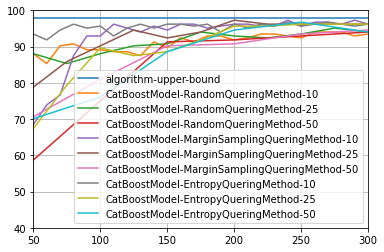

In [30]:
models = ['CatBoostModel']
quering_methods = ['RandomQueringMethod','MarginSamplingQueringMethod','EntropyQueringMethod']
Ks = ['10', '25','50' ] 
repeats = 1

catboost_upper_bound = 98.

total_experiments = len(models) * len(quering_methods) * len(Ks) * repeats


plot_results(catboost_upper_bound, d, ['CatBoostModel'] , quering_methods, Ks, 1)

<h2>XGBoostModel experiments</h2>

In [32]:
max_queried = 300

repeats = 1


models = [XGBoostModel] 


quering_methods = [RandomQueringMethod,MarginSamplingQueringMethod,EntropyQueringMethod]


Ks = [10,25,50] 

d = {}
stopped_at = -1 


d = experiment(d, models, quering_methods, Ks, repeats, stopped_at+1)
print (d)
results = json.loads(json.dumps(d, indent=2, sort_keys=True))
print(results)

stopping at: 300
Count = 1, using model = XGBoostModel, quering_method = RandomQueringMethod, k = 10, iteration = 0.
initial train set: (10, 25) (10,) unique(labels): [8 2] [0 1]
Train set: (10, 25) y: (10,)
Val   set: (726, 25)
Test  set: (184, 25)
training xgboost...
[09:43:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
Iteration number:  1
Example run in 0.05 s

Accuracy for 73.913043 
updated train set: (20, 25) (20,) unique(labels): [15  5] [0 1]
Train set: (20, 25) y: (20,)
Val   set: (716, 25)
Test  set: (184, 25)
training xgboost...
[09:43:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


updated train set: (50, 25) (50,) unique(labels): [38 12] [0 1]
Train set: (50, 25) y: (50,)
Val   set: (686, 25)
Test  set: (184, 25)
training xgboost...
[09:43:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
Iteration number:  5
Example run in 0.05 s

Accuracy for 88.586957 
updated train set: (60, 25) (60,) unique(labels): [44 16] [0 1]
Train set: (60, 25) y: (60,)
Val   set: (676, 25)
Test  set: (184, 25)
training xgboost...
[09:43:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Ex

updated train set: (200, 25) (200,) unique(labels): [150  50] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training xgboost...
[09:43:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
Iteration number:  20
Example run in 0.08 s

Accuracy for 90.217391 
updated train set: (210, 25) (210,) unique(labels): [160  50] [0 1]
Train set: (210, 25) y: (210,)
Val   set: (526, 25)
Test  set: (184, 25)
training xgboost...
[09:43:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


updated train set: (100, 25) (100,) unique(labels): [75 25] [0 1]
Train set: (100, 25) y: (100,)
Val   set: (636, 25)
Test  set: (184, 25)
training xgboost...
[09:43:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
Iteration number:  4
Example run in 0.07 s

Accuracy for 82.608696 
updated train set: (125, 25) (125,) unique(labels): [93 32] [0 1]
Train set: (125, 25) y: (125,)
Val   set: (611, 25)
Test  set: (184, 25)
training xgboost...
[09:43:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logl

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


-----------------------------------
Iteration number:  3
Example run in 0.08 s

Accuracy for 86.413043 
updated train set: (200, 25) (200,) unique(labels): [144  56] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training xgboost...
[09:44:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
Iteration number:  4
Example run in 0.09 s

Accuracy for 89.130435 
updated train set: (250, 25) (250,) unique(labels): [179  71] [0 1]
Train set: (250, 25) y: (250,)
Val   set: (486, 25)
Test  set: (184, 25)
training xgboost...
[09:44:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


updated train set: (30, 25) (30,) unique(labels): [18 12] [0 1]
Train set: (30, 25) y: (30,)
Val   set: (706, 25)
Test  set: (184, 25)
training xgboost...
[09:44:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
Iteration number:  3
Example run in 0.05 s

Accuracy for 80.978261 
updated train set: (40, 25) (40,) unique(labels): [19 21] [0 1]
Train set: (40, 25) y: (40,)
Val   set: (696, 25)
Test  set: (184, 25)
training xgboost...
[09:44:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Ex

Train set: (180, 25) y: (180,)
Val   set: (556, 25)
Test  set: (184, 25)
training xgboost...
[09:44:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
Iteration number:  18
Example run in 0.08 s

Accuracy for 95.108696 
updated train set: (190, 25) (190,) unique(labels): [ 90 100] [0 1]
Train set: (190, 25) y: (190,)
Val   set: (546, 25)
Test  set: (184, 25)
training xgboost...
[09:44:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the o

initial train set: (25, 25) (25,) unique(labels): [18  7] [0 1]
Train set: (25, 25) y: (25,)
Val   set: (711, 25)
Test  set: (184, 25)
training xgboost...
[09:44:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
Iteration number:  1
Example run in 0.07 s

Accuracy for 70.108696 
updated train set: (50, 25) (50,) unique(labels): [39 11] [0 1]
Train set: (50, 25) y: (50,)
Val   set: (686, 25)
Test  set: (184, 25)
training xgboost...
[09:44:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Ex

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


-----------------------------------
Iteration number:  3
Example run in 0.13 s

Accuracy for 76.086957 
updated train set: (100, 25) (100,) unique(labels): [69 31] [0 1]
Train set: (100, 25) y: (100,)
Val   set: (636, 25)
Test  set: (184, 25)
training xgboost...
[09:44:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
Iteration number:  4
Example run in 0.11 s

Accuracy for 78.804348 
updated train set: (125, 25) (125,) unique(labels): [72 53] [0 1]
Train set: (125, 25) y: (125,)
Val   set: (611, 25)
Test  set: (184, 25)
training xgboost...
[09:44:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, t

initial train set: (50, 25) (50,) unique(labels): [36 14] [0 1]
Train set: (50, 25) y: (50,)
Val   set: (686, 25)
Test  set: (184, 25)
training xgboost...
[09:45:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
Iteration number:  1
Example run in 0.08 s

Accuracy for 62.500000 
updated train set: (100, 25) (100,) unique(labels): [78 22] [0 1]
Train set: (100, 25) y: (100,)
Val   set: (636, 25)
Test  set: (184, 25)
training xgboost...
[09:45:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


updated train set: (150, 25) (150,) unique(labels): [113  37] [0 1]
Train set: (150, 25) y: (150,)
Val   set: (586, 25)
Test  set: (184, 25)
training xgboost...
[09:45:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
Iteration number:  3
Example run in 0.10 s

Accuracy for 85.326087 
updated train set: (200, 25) (200,) unique(labels): [136  64] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training xgboost...
[09:45:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to '

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


-----------------------------------
Iteration number:  2
Example run in 0.07 s

Accuracy for 70.108696 
updated train set: (30, 25) (30,) unique(labels): [19 11] [0 1]
Train set: (30, 25) y: (30,)
Val   set: (706, 25)
Test  set: (184, 25)
training xgboost...
[09:45:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
Iteration number:  3
Example run in 0.07 s

Accuracy for 63.586957 
updated train set: (40, 25) (40,) unique(labels): [29 11] [0 1]
Train set: (40, 25) y: (40,)
Val   set: (696, 25)
Test  set: (184, 25)
training xgboost...
[09:45:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the defau

-----------------------------------
Iteration number:  16
Example run in 0.10 s

Accuracy for 94.021739 
updated train set: (170, 25) (170,) unique(labels): [102  68] [0 1]
Train set: (170, 25) y: (170,)
Val   set: (566, 25)
Test  set: (184, 25)
training xgboost...
[09:45:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
Iteration number:  17
Example run in 0.10 s

Accuracy for 94.565217 
updated train set: (180, 25) (180,) unique(labels): [104  76] [0 1]
Train set: (180, 25) y: (180,)
Val   set: (556, 25)
Test  set: (184, 25)
training xgboost...
[09:45:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.

-----------------------------------
Iteration number:  30
Example run in 0.13 s

Accuracy for 95.108696 
final active learning accuracies [29.891304347826086, 70.1086956521739, 63.58695652173913, 86.41304347826086, 91.84782608695652, 91.30434782608695, 91.84782608695652, 89.13043478260869, 92.3913043478261, 94.02173913043478, 95.1086956521739, 94.56521739130434, 94.56521739130434, 94.02173913043478, 94.02173913043478, 94.02173913043478, 94.56521739130434, 94.56521739130434, 95.1086956521739, 95.1086956521739, 94.02173913043478, 94.56521739130434, 94.56521739130434, 94.56521739130434, 94.02173913043478, 95.1086956521739, 95.1086956521739, 95.65217391304348, 95.1086956521739, 95.1086956521739]
saved Active-learning-experiment-7.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experiment-3.pkl'

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


-----------------------------------
Iteration number:  3
Example run in 0.09 s

Accuracy for 77.173913 
updated train set: (100, 25) (100,) unique(labels): [59 41] [0 1]
Train set: (100, 25) y: (100,)
Val   set: (636, 25)
Test  set: (184, 25)
training xgboost...
[09:45:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
Iteration number:  4
Example run in 0.09 s

Accuracy for 86.413043 
updated train set: (125, 25) (125,) unique(labels): [64 61] [0 1]
Train set: (125, 25) y: (125,)
Val   set: (611, 25)
Test  set: (184, 25)
training xgboost...
[09:45:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, t

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


-----------------------------------
Iteration number:  3
Example run in 0.07 s

Accuracy for 91.304348 
updated train set: (200, 25) (200,) unique(labels): [112  88] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training xgboost...
[09:46:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-----------------------------------
Iteration number:  4
Example run in 0.09 s

Accuracy for 94.021739 
updated train set: (250, 25) (250,) unique(labels): [139 111] [0 1]
Train set: (250, 25) y: (250,)
Val   set: (486, 25)
Test  set: (184, 25)
training xgboost...
[09:46:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.

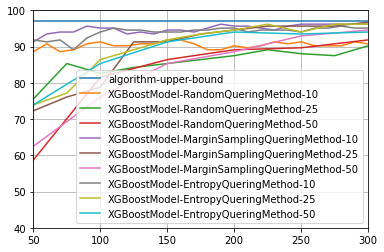

In [33]:
models = ['XGBoostModel']
quering_methods = ['RandomQueringMethod','MarginSamplingQueringMethod','EntropyQueringMethod']
Ks = ['10','25','50'] 
repeats = 1
upper_bound = 97.

total_experiments = len(models) * len(quering_methods) * len(Ks) * repeats


plot_results(upper_bound, d, ['XGBoostModel'] , quering_methods  , Ks, 1)

<h2>BaggingModel experiments</h2>

In [34]:
max_queried = 300

repeats = 1


models = [BaggingModel] 

quering_methods = [RandomQueringMethod,MarginSamplingQueringMethod]


Ks = [10,25,50] 

d = {}
stopped_at = -1 

d = experiment(d, models, quering_methods, Ks, repeats, stopped_at+1)
print (d)
results = json.loads(json.dumps(d, indent=2, sort_keys=True))
print(results)

stopping at: 300
Count = 1, using model = BaggingModel, quering_method = RandomQueringMethod, k = 10, iteration = 0.
initial train set: (10, 25) (10,) unique(labels): [7 3] [0 1]
Train set: (10, 25) y: (10,)
Val   set: (726, 25)
Test  set: (184, 25)
training bagging model...
-----------------------------------
Iteration number:  1
Example run in 0.29 s

Accuracy for 60.869565 
updated train set: (20, 25) (20,) unique(labels): [15  5] [0 1]
Train set: (20, 25) y: (20,)
Val   set: (716, 25)
Test  set: (184, 25)
training bagging model...
-----------------------------------
Iteration number:  2
Example run in 0.26 s

Accuracy for 77.173913 
updated train set: (30, 25) (30,) unique(labels): [21  9] [0 1]
Train set: (30, 25) y: (30,)
Val   set: (706, 25)
Test  set: (184, 25)
training bagging model...
-----------------------------------
Iteration number:  3
Example run in 0.27 s

Accuracy for 77.173913 
updated train set: (40, 25) (40,) unique(labels): [31  9] [0 1]
Train set: (40, 25) y: (40

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
Iteration number:  25
Example run in 0.80 s

Accuracy for 92.391304 
updated train set: (260, 25) (260,) unique(labels): [198  62] [0 1]
Train set: (260, 25) y: (260,)
Val   set: (476, 25)
Test  set: (184, 25)
training bagging model...
-----------------------------------
Iteration number:  26
Example run in 0.77 s

Accuracy for 91.847826 
updated train set: (270, 25) (270,) unique(labels): [206  64] [0 1]
Train set: (270, 25) y: (270,)
Val   set: (466, 25)
Test  set: (184, 25)
training bagging model...
-----------------------------------
Iteration number:  27
Example run in 0.80 s

Accuracy for 91.847826 
updated train set: (280, 25) (280,) unique(labels): [211  69] [0 1]
Train set: (280, 25) y: (280,)
Val   set: (456, 25)
Test  set: (184, 25)
training bagging model...
-----------------------------------
Iteration number:  28
Example run in 0.69 s

Accuracy for 91.304348 
updated train set: (290, 25) (290,) unique(labels): [219  71] [0 1]
Train set: 

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
Iteration number:  6
Example run in 0.74 s

Accuracy for 86.413043 
updated train set: (175, 25) (175,) unique(labels): [131  44] [0 1]
Train set: (175, 25) y: (175,)
Val   set: (561, 25)
Test  set: (184, 25)
training bagging model...
-----------------------------------
Iteration number:  7
Example run in 0.84 s

Accuracy for 86.413043 
updated train set: (200, 25) (200,) unique(labels): [151  49] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training bagging model...
-----------------------------------
Iteration number:  8
Example run in 0.96 s

Accuracy for 87.500000 
updated train set: (225, 25) (225,) unique(labels): [165  60] [0 1]
Train set: (225, 25) y: (225,)
Val   set: (511, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
Iteration number:  9
Example run in 1.10 s

Accuracy for 88.043478 
updated train set: (250, 25) (250,) unique(labels): [187  63] [0 1]
Train set: (250, 25) y: (250,)
Val   set: (486, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
Iteration number:  10
Example run in 1.25 s

Accuracy for 88.586957 
updated train set: (275, 25) (275,) unique(labels): [205  70] [0 1]
Train set: (275, 25) y: (275,)
Val   set: (461, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
Iteration number:  11
Example run in 1.36 s

Accuracy for 90.760870 
updated train set: (300, 25) (300,) unique(labels): [225  75] [0 1]
Train set: (300, 25) y: (300,)
Val   set: (436, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
Iteration number:  12
Example run in 1.13 s

Accuracy for 90.217391 
final active learning accuracies [71.73913043478261, 83.15217391304348, 84.78260869565217, 84.23913043478261, 85.32608695652173, 86.41304347826086, 86.41304347826086, 87.5, 88.04347826086956, 88.58695652173914, 90.76086956521739, 90.21739130434783]
saved Active-learning-experiment-2.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experiment-3.pkl', 'Active-learning-experiment-4.pkl', 'Active-learning-experiment-5.pkl', 'Active-learning-experiment-6.pkl', 'Active-learning-experiment-7.pkl', 'Active-learning-experiment-8.pkl', 'Active-learning-experiment-9.pkl', 'catboost_info', 'Dataset', 'God class - active learning.ipynb', 'God class.ipynb', 'Long methode.ipynb', 'na gitu', 'slike']

--

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
Iteration number:  2
Example run in 0.80 s

Accuracy for 79.891304 
updated train set: (150, 25) (150,) unique(labels): [107  43] [0 1]
Train set: (150, 25) y: (150,)
Val   set: (586, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
Iteration number:  3
Example run in 1.13 s

Accuracy for 88.586957 
updated train set: (200, 25) (200,) unique(labels): [143  57] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
Iteration number:  4
Example run in 1.06 s

Accuracy for 90.217391 
updated train set: (250, 25) (250,) unique(labels): [179  71] [0 1]
Train set: (250, 25) y: (250,)
Val   set: (486, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
Iteration number:  5
Example run in 1.61 s

Accuracy for 91.304348 
updated train set: (300, 25) (300,) unique(labels): [217  83] [0 1]
Train set: (300, 25) y: (300,)
Val   set: (436, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
Iteration number:  6
Example run in 2.21 s

Accuracy for 90.760870 
final active learning accuracies [67.3913043478261, 79.8913043478261, 88.58695652173914, 90.21739130434783, 91.30434782608695, 90.76086956521739]
saved Active-learning-experiment-3.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experiment-3.pkl', 'Active-learning-experiment-4.pkl', 'Active-learning-experiment-5.pkl', 'Active-learning-experiment-6.pkl', 'Active-learning-experiment-7.pkl', 'Active-learning-experiment-8.pkl', 'Active-learning-experiment-9.pkl', 'catboost_info', 'Dataset', 'God class - active learning.ipynb', 'God class.ipynb', 'Long methode.ipynb', 'na gitu', 'slike']

---------------------------- FINISHED ---------------------------

Count = 4, using model = BaggingModel, 

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
Iteration number:  16
Example run in 0.74 s

Accuracy for 94.565217 
updated train set: (170, 25) (170,) unique(labels): [97 73] [0 1]
Train set: (170, 25) y: (170,)
Val   set: (566, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
Iteration number:  17
Example run in 0.83 s

Accuracy for 94.565217 
updated train set: (180, 25) (180,) unique(labels): [103  77] [0 1]
Train set: (180, 25) y: (180,)
Val   set: (556, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
Iteration number:  18
Example run in 1.33 s

Accuracy for 94.565217 
updated train set: (190, 25) (190,) unique(labels): [111  79] [0 1]
Train set: (190, 25) y: (190,)
Val   set: (546, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
Iteration number:  19
Example run in 1.33 s

Accuracy for 94.565217 
updated train set: (200, 25) (200,) unique(labels): [118  82] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
Iteration number:  20
Example run in 1.55 s

Accuracy for 94.565217 
updated train set: (210, 25) (210,) unique(labels): [123  87] [0 1]
Train set: (210, 25) y: (210,)
Val   set: (526, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
Iteration number:  21
Example run in 1.88 s

Accuracy for 92.934783 
updated train set: (220, 25) (220,) unique(labels): [133  87] [0 1]
Train set: (220, 25) y: (220,)
Val   set: (516, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
Iteration number:  22
Example run in 1.66 s

Accuracy for 92.934783 
updated train set: (230, 25) (230,) unique(labels): [140  90] [0 1]
Train set: (230, 25) y: (230,)
Val   set: (506, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
Iteration number:  23
Example run in 1.83 s

Accuracy for 93.478261 
updated train set: (240, 25) (240,) unique(labels): [148  92] [0 1]
Train set: (240, 25) y: (240,)
Val   set: (496, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
Iteration number:  24
Example run in 2.14 s

Accuracy for 93.478261 
updated train set: (250, 25) (250,) unique(labels): [155  95] [0 1]
Train set: (250, 25) y: (250,)
Val   set: (486, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
Iteration number:  25
Example run in 1.88 s

Accuracy for 92.934783 
updated train set: (260, 25) (260,) unique(labels): [161  99] [0 1]
Train set: (260, 25) y: (260,)
Val   set: (476, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
Iteration number:  26
Example run in 1.23 s

Accuracy for 91.847826 
updated train set: (270, 25) (270,) unique(labels): [164 106] [0 1]
Train set: (270, 25) y: (270,)
Val   set: (466, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
Iteration number:  27
Example run in 1.68 s

Accuracy for 93.478261 
updated train set: (280, 25) (280,) unique(labels): [172 108] [0 1]
Train set: (280, 25) y: (280,)
Val   set: (456, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
Iteration number:  28
Example run in 2.22 s

Accuracy for 93.478261 
updated train set: (290, 25) (290,) unique(labels): [182 108] [0 1]
Train set: (290, 25) y: (290,)
Val   set: (446, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
Iteration number:  29
Example run in 2.00 s

Accuracy for 93.478261 
updated train set: (300, 25) (300,) unique(labels): [192 108] [0 1]
Train set: (300, 25) y: (300,)
Val   set: (436, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
Iteration number:  30
Example run in 2.11 s

Accuracy for 92.934783 
final active learning accuracies [80.97826086956522, 88.04347826086956, 87.5, 86.95652173913044, 91.30434782608695, 90.76086956521739, 91.30434782608695, 91.84782608695652, 92.3913043478261, 92.3913043478261, 90.76086956521739, 91.84782608695652, 93.47826086956522, 93.47826086956522, 94.56521739130434, 94.56521739130434, 94.56521739130434, 94.56521739130434, 94.56521739130434, 94.56521739130434, 92.93478260869566, 92.93478260869566, 93.47826086956522, 93.47826086956522, 92.93478260869566, 91.84782608695652, 93.47826086956522, 93.47826086956522, 93.47826086956522, 92.93478260869566]
saved Active-learning-experiment-4.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experiment-3.pkl', 'Acti

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-----------------------------------
Iteration number:  4
Example run in 0.81 s

Accuracy for 87.500000 
updated train set: (125, 25) (125,) unique(labels): [70 55] [0 1]
Train set: (125, 25) y: (125,)
Val   set: (611, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
Iteration number:  5
Example run in 1.11 s

Accuracy for 85.869565 
updated train set: (150, 25) (150,) unique(labels): [79 71] [0 1]
Train set: (150, 25) y: (150,)
Val   set: (586, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
Iteration number:  6
Example run in 1.40 s

Accuracy for 86.956522 
updated train set: (175, 25) (175,) unique(labels): [92 83] [0 1]
Train set: (175, 25) y: (175,)
Val   set: (561, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
Iteration number:  7
Example run in 1.76 s

Accuracy for 86.956522 
updated train set: (200, 25) (200,) unique(labels): [100 100] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
Iteration number:  8
Example run in 2.14 s

Accuracy for 88.043478 
updated train set: (225, 25) (225,) unique(labels): [112 113] [0 1]
Train set: (225, 25) y: (225,)
Val   set: (511, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
Iteration number:  9
Example run in 1.48 s

Accuracy for 89.673913 
updated train set: (250, 25) (250,) unique(labels): [128 122] [0 1]
Train set: (250, 25) y: (250,)
Val   set: (486, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
Iteration number:  10
Example run in 2.35 s

Accuracy for 90.760870 
updated train set: (275, 25) (275,) unique(labels): [144 131] [0 1]
Train set: (275, 25) y: (275,)
Val   set: (461, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
Iteration number:  11
Example run in 3.02 s

Accuracy for 90.217391 
updated train set: (300, 25) (300,) unique(labels): [163 137] [0 1]
Train set: (300, 25) y: (300,)
Val   set: (436, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
Iteration number:  12
Example run in 3.04 s

Accuracy for 89.673913 
final active learning accuracies [72.82608695652173, 79.34782608695652, 82.06521739130434, 87.5, 85.86956521739131, 86.95652173913044, 86.95652173913044, 88.04347826086956, 89.67391304347827, 90.76086956521739, 90.21739130434783, 89.67391304347827]
saved Active-learning-experiment-5.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experiment-3.pkl', 'Active-learning-experiment-4.pkl', 'Active-learning-experiment-5.pkl', 'Active-learning-experiment-6.pkl', 'Active-learning-experiment-7.pkl', 'Active-learning-experiment-8.pkl', 'Active-learning-experiment-9.pkl', 'catboost_info', 'Dataset', 'God class - active learning.ipynb', 'God class.ipynb', 'Long methode.ipynb', 'na gitu', 'slike']
{
 

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
Iteration number:  3
Example run in 0.96 s

Accuracy for 83.695652 
updated train set: (200, 25) (200,) unique(labels): [117  83] [0 1]
Train set: (200, 25) y: (200,)
Val   set: (536, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
Iteration number:  4
Example run in 1.77 s

Accuracy for 84.782609 
updated train set: (250, 25) (250,) unique(labels): [140 110] [0 1]
Train set: (250, 25) y: (250,)
Val   set: (486, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
Iteration number:  5
Example run in 2.76 s

Accuracy for 87.500000 
updated train set: (300, 25) (300,) unique(labels): [170 130] [0 1]
Train set: (300, 25) y: (300,)
Val   set: (436, 25)
Test  set: (184, 25)
training bagging model...


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

-----------------------------------
Iteration number:  6
Example run in 3.06 s

Accuracy for 89.130435 
final active learning accuracies [65.21739130434783, 79.8913043478261, 83.69565217391305, 84.78260869565217, 87.5, 89.13043478260869]
saved Active-learning-experiment-6.pkl C:\Users\Mihajlo\Desktop\Mihajlo\faks\4 godina\diplomski ['.ipynb_checkpoints', 'Active-learning-experiment-1.pkl', 'Active-learning-experiment-10.pkl', 'Active-learning-experiment-11.pkl', 'Active-learning-experiment-2.pkl', 'Active-learning-experiment-3.pkl', 'Active-learning-experiment-4.pkl', 'Active-learning-experiment-5.pkl', 'Active-learning-experiment-6.pkl', 'Active-learning-experiment-7.pkl', 'Active-learning-experiment-8.pkl', 'Active-learning-experiment-9.pkl', 'catboost_info', 'Dataset', 'God class - active learning.ipynb', 'God class.ipynb', 'Long methode.ipynb', 'na gitu', 'slike']

---------------------------- FINISHED ---------------------------

{'BaggingModel': {'RandomQueringMethod': {'10': [[6

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


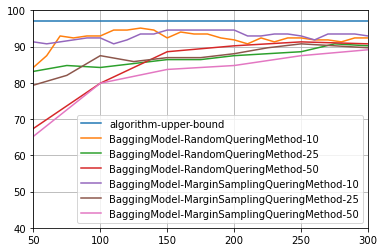

In [35]:
models = ['BaggingModel']
quering_methods = ['RandomQueringMethod','MarginSamplingQueringMethod']
Ks = ['10','25','50'] 
repeats = 1
upper_bound = 97.
total_experiments = len(models) * len(quering_methods) * len(Ks) * repeats


plot_results(upper_bound, d, ['BaggingModel'] , quering_methods , Ks, 1)